In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import json



ruta = r'D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\Cyber Events Database - Records thru June 2024.csv'
df = pd.read_csv(ruta, encoding='utf-8')

In [3]:
df.info()
df.head()
print(df.isnull())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14041 entries, 0 to 14040
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   slug           14041 non-null  object
 1   event_date     14041 non-null  object
 2   year           14041 non-null  int64 
 3   month          14041 non-null  int64 
 4   actor          14041 non-null  object
 5   actor_type     14041 non-null  object
 6   organization   14041 non-null  object
 7   industry_code  14041 non-null  int64 
 8   industry       14041 non-null  object
 9   motive         14041 non-null  object
 10  event_type     14041 non-null  object
 11  event_subtype  14041 non-null  object
 12  description    14041 non-null  object
 13  source_url     14037 non-null  object
 14  country        14041 non-null  object
 15  actor_country  14041 non-null  object
 16  change_log     59 non-null     object
dtypes: int64(3), object(14)
memory usage: 1.8+ MB
        slug  event_dat

In [4]:
# Renombrar columnas específicas
df = df.rename(columns={
        'slug': 'id',
    'event_date': 'date',
    'actor_country': 'attacking_country'
    })


print(df.columns)

Index(['id', 'date', 'year', 'month', 'actor', 'actor_type', 'organization',
       'industry_code', 'industry', 'motive', 'event_type', 'event_subtype',
       'description', 'source_url', 'country', 'attacking_country',
       'change_log'],
      dtype='object')


In [5]:
# Verificar duplicados en la columna 'slug'
duplicados_slug = df['id'].duplicated().sum()

if duplicados_slug == 0:
    print("La columna 'slug' es única.")
else:
    print(f"La columna 'slug' tiene {duplicados_slug} valores duplicados.")



# Rellenar valores nulos con un valor específico
df['source_url'] = df['source_url'].fillna('Unknow')
df['change_log'] = df['change_log'].fillna('Unknow')

print(df.isnull())
print(df.isnull().sum())



La columna 'slug' es única.
          id   date   year  month  actor  actor_type  organization  \
0      False  False  False  False  False       False         False   
1      False  False  False  False  False       False         False   
2      False  False  False  False  False       False         False   
3      False  False  False  False  False       False         False   
4      False  False  False  False  False       False         False   
...      ...    ...    ...    ...    ...         ...           ...   
14036  False  False  False  False  False       False         False   
14037  False  False  False  False  False       False         False   
14038  False  False  False  False  False       False         False   
14039  False  False  False  False  False       False         False   
14040  False  False  False  False  False       False         False   

       industry_code  industry  motive  event_type  event_subtype  \
0              False     False   False       False          Fa

In [6]:
# Eliminar espacios al inicio y al final de los valores en 'event_type'
df['event_type'] = df['event_type'].str.strip()


# Verificar valores únicos después de limpiar los espacios
valores_unicos = df['event_type'].unique()
print(f'Valores únicos en event_type después de limpiar espacios:\n{valores_unicos}')


# Eliminar filas duplicadas
df = df.drop_duplicates()

# Confirmar cambios
print(f'Tamaño del DataFrame después de eliminar duplicados: {df.shape}')


# Número de duplicados eliminados
duplicados_eliminados = df.duplicated().sum()
print(f'Número de duplicados eliminados: {duplicados_eliminados}')

Valores únicos en event_type después de limpiar espacios:
['Exploitive' 'Disruptive' 'Mixed' 'Undetermined']
Tamaño del DataFrame después de eliminar duplicados: (14041, 17)
Número de duplicados eliminados: 0


In [7]:
# Filtrar filas donde 'event_type' es 'Disruptive'
disruptive_rows = df[df['event_type'] == 'Disruptive']

# Mostrar todas las filas filtradas
print(disruptive_rows)
df.info()
df.head()

                     id        date  year  month                   actor  \
2      3bbe0695e2d019f3  2014-01-01  2014      1  Syrian Electronic Army   
4      3a94b8cf6dde1f66  2014-01-03  2014      1           DERP Trolling   
5      6eb9381090e64eb5  2014-01-03  2014      1           DERP Trolling   
6      128ad0dc650499fa  2014-01-03  2014      1           DERP Trolling   
7      79fa7d3ff14f2e1c  2014-01-03  2014      1           DERP Trolling   
...                 ...         ...   ...    ...                     ...   
14007  ED4795E1E66CC01A  2024-05-26  2024      5            SN_Blackmeta   
14018  C9C900003754F1B8  2023-10-23  2023     10            Undetermined   
14022  C92EA6718C4D4D5F  2024-05-23  2024      5               Head Mare   
14029  00CB434C921F7A5B  2024-05-13  2024      5            Undetermined   
14030  1228B0EB1334BBA6  2024-05-09  2024      5            Undetermined   

         actor_type           organization  industry_code  \
2        Hacktivist   Skyp

,id,date,year,month,actor,actor_type,organization,industry_code,industry,motive,event_type,event_subtype,description,source_url,country,attacking_country,change_log
0,1f72c2eb8ab303e4,2014-01-01,2014,1,Undetermined,Criminal,Barry University,61,Educational Services,Undetermined,Exploitive,Exploitation of End Hosts,Barry University notifies patients of its Foot...,https://www.beckershospitalreview.com/healthca...,United States of America,Undetermined,Unknow
1,ecac8b3e60a2f72f,2014-01-01,2014,1,Undetermined,Criminal,Record Assist LLC,54,"Professional, Scientific, and Technical Services",Undetermined,Exploitive,Exploitation of Application Server,Record Assist LLC notifies of an unauthorized ...,https://privacyrights.org/data-breaches/record...,United States of America,Undetermined,Unknow
2,3bbe0695e2d019f3,2014-01-01,2014,1,Syrian Electronic Army,Hacktivist,Skype's Social Media,54,"Professional, Scientific, and Technical Services",Protest,Disruptive,Message Manipulation,The Syrian Electronic Army hacks Skype's Twitt...,http://thenextweb.com/microsoft/2014/01/01/sky...,United States of America,Syrian Arab Republic,Unknow
3,6100014f6ca84b3d,2014-01-02,2014,1,Undetermined,Criminal,Snapchat,51,Information,Undetermined,Exploitive,Exploitation of Application Server,Greyhat hackers publish the partial phone numb...,http://arstechnica.com/security/2014/01/greyha...,United States of America,Undetermined,Unknow
4,3a94b8cf6dde1f66,2014-01-03,2014,1,DERP Trolling,Undetermined,Battle.net,51,Information,Undetermined,Disruptive,External Denial of Service,"The servers for Steam, Origin, Battle.net, and...",http://arstechnica.com/gaming/2014/01/multiple...,United States of America,Undetermined,Unknow


In [8]:
# Contar la frecuencia de cada valor en 'event_subtype'
event_subtype_counts = df['event_subtype'].value_counts()

# Filtrar los valores únicos
unique_event_subtypes = event_subtype_counts[event_subtype_counts == 1].index

# Seleccionar los registros con valores únicos en 'event_subtype'
unique_event_subtype_df = df[df['event_subtype'].isin(unique_event_subtypes)]

# Verificar los registros seleccionados
print(unique_event_subtype_df)

                     id        date  year  month  \
114    39c2b71d9b14c510  2014-02-10  2014      2   
886    164297d69e87d659  2015-04-09  2015      4   
1740   2a7561117a20c6e3  2016-03-11  2016      3   
2310   8d9c67eed9bca648  2016-09-06  2016      9   
2792   d48da4da416c474c  2017-04-04  2017      4   
2988   87b0176a9efd6722  2017-06-18  2017      6   
3498   9b8da7f1e42f93c8  2018-02-13  2018      2   
4294   c91e288e39886406  2019-01-31  2019      1   
4307   f68c05fdf14614d6  2019-02-04  2019      2   
4363   aaab1fb19b31654f  2019-02-22  2019      2   
4380   83260a9796c988f6  2019-02-28  2019      2   
4613   f4ffebc33be9e940  2019-05-20  2019      5   
5749   d8b06d0421c37b4f  2020-04-30  2020      4   
5806   fcf2b725d756e98c  2020-05-09  2020      5   
5868   62c994af85b89543  2020-05-31  2020      5   
5990   8f79ed17c0069709  2020-07-01  2020      7   
6524   fe693f40183c02f6  2020-10-06  2020     10   
7118   334e7d7a4541d17f  2021-01-19  2021      1   
7692   269be

In [9]:
# Modificacion Paises
# Diccionario con las correcciones de nombres de países
country_corrections = {
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Syrian Arab Republic": "Syria",
    "Korea (the Republic of)": "South Korea",
    "Russian Federation": "Russia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Taiwan (Province of China)": "Taiwan",
    "Viet Nam": "Vietnam",
    "Holy See": "Vatican",
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Tanzania, United Republic of": "Tanzania",
    "Korea (the Democratic People's Republic of)": "North Korea",
    "Republic of North Macedonia": "North Macedonia",
    "Moldova (the Republic of)": "Moldova",
    "Palestine, State of": "Palestine",
    "Islamic Republic of Iran": "Iran",
    "Czech Republic": "Czechia",
    "Undetermined": None,  
    "Multiple": None,  
    
}

# Aplicar correcciones a `country` y `attacking_country`
df['country'] = df['country'].replace(country_corrections)
df['attacking_country'] = df['attacking_country'].replace(country_corrections)



In [10]:
# Filter and standardize country names
name_corrections = {
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Syrian Arab Republic": "Syria",
    "Korea (the Republic of)": "South Korea",
    "Russian Federation": "Russia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Iran (Islamic Republic of)": "Iran",
    "Taiwan (Province of China)": "Taiwan",
    "Viet Nam": "Vietnam",
    "Holy See": "Vatican",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Tanzania, United Republic of": "Tanzania",
    "Islamic Republic of Iran": "Iran",
    "Korea (the Democratic People's Republic of)": "North Korea",
    "Czech Republic": "Czechia",
    "Palestine, State of": "Palestine",
    "Lao People's Democratic Republic": "Laos",
    "Hong Kong": "Hong Kong",
    "Multiple": None,
    "European Union": None
}
df['country'] = df['country'].replace(name_corrections)
df['attacking_country'] = df['attacking_country'].replace(name_corrections)


In [ ]:
# Modificacion fecha
print(df['date'].head())

# Limpiar los datos de la columna 'event_date' eliminando espacios al principio y al final
df['date'] = df['date'].str.strip()

# Convertir la columna 'event_date' al formato datetime usando el formato '%Y-%m-%d'
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d')

# Verificar cuántos valores NaT hay después de la conversión
nat_count = df['date'].isna().sum()
print(f'Número de valores NaT después de la conversión: {nat_count}')

¡

# Confirmar el tipo de datos de la columna 'event_date'
print(f'Tipo de datos de date: {df["date"].dtypes}')


print(df.head())
df.info()
print(df['date'].head())

0    2014-01-01
1    2014-01-01
2    2014-01-01
3    2014-01-02
4    2014-01-03
Name: date, dtype: object
Número de valores NaT después de la conversión: 2
Tipo de datos de date: datetime64[ns]
                 id       date  year  month                   actor  \
0  1f72c2eb8ab303e4 2014-01-01  2014      1            Undetermined   
1  ecac8b3e60a2f72f 2014-01-01  2014      1            Undetermined   
2  3bbe0695e2d019f3 2014-01-01  2014      1  Syrian Electronic Army   
3  6100014f6ca84b3d 2014-01-02  2014      1            Undetermined   
4  3a94b8cf6dde1f66 2014-01-03  2014      1           DERP Trolling   

     actor_type          organization  industry_code  \
0      Criminal      Barry University             61   
1      Criminal     Record Assist LLC             54   
2    Hacktivist  Skype's Social Media             54   
3      Criminal              Snapchat             51   
4  Undetermined            Battle.net             51   

                                          

In [12]:
# Contar la frecuencia de cada valor en 'event_subtype'
event_subtype_counts = df['event_subtype'].value_counts()

# Filtrar los valores únicos
unique_event_subtypes = event_subtype_counts[event_subtype_counts == 1].index

# Crear una nueva columna para los subtipos agrupados
def group_event_subtype(subtype):
    if subtype in unique_event_subtypes:
        return subtype  # Mantener valores únicos
    else:
        return 'Multiple_type'  # Agrupar valores con más de un registro

df['event_subtype_grouped'] = df['event_subtype'].apply(group_event_subtype)

# Verificar los cambios realizados
print(df[['event_subtype', 'event_subtype_grouped']].head(10))

# Mostrar todos los registros con valores únicos en 'event_subtype'
print(df[df['event_subtype'].isin(unique_event_subtypes)])

                        event_subtype event_subtype_grouped
0           Exploitation of End Hosts         Multiple_type
1  Exploitation of Application Server         Multiple_type
2                Message Manipulation         Multiple_type
3  Exploitation of Application Server         Multiple_type
4          External Denial of Service         Multiple_type
5          External Denial of Service         Multiple_type
6          External Denial of Service         Multiple_type
7          External Denial of Service         Multiple_type
8  Exploitation of Application Server         Multiple_type
9          External Denial of Service         Multiple_type
                     id       date  year  month  \
114    39c2b71d9b14c510 2014-02-10  2014      2   
886    164297d69e87d659 2015-04-09  2015      4   
1740   2a7561117a20c6e3 2016-03-11  2016      3   
2310   8d9c67eed9bca648 2016-09-06  2016      9   
2792   d48da4da416c474c 2017-04-04  2017      4   
2988   87b0176a9efd6722 2017-06-18

In [13]:
# Identificar el ID específico
id_especifico = 'A136183AE5ED5D7D'

# Intercambiar los valores de las columnas 'organization' e 'industry' para el ID específico
mask = df['id'] == id_especifico
df.loc[mask, ['organization', 'industry']] = df.loc[mask, ['industry', 'organization']].values

# Verificar si se realizaron los cambios correctamente
print(df[df['id'] == id_especifico])

                     id       date  year  month         actor actor_type  \
13802  A136183AE5ED5D7D 2024-03-30  2024      3  Undetermined   Criminal   

      organization  industry_code                           industry  \
13802       Medusa             99  Traverse City Area Public Schools   

          motive event_type event_subtype  \
13802  Financial      Mixed   Data Attack   

                                             description  \
13802  The Traverse City Area Public Schools (TCAPS) ...   

                                              source_url  \
13802  https://databreaches.net/2024/03/31/tcaps-hack...   

                        country attacking_country change_log  \
13802  United States of America              None     Unknow   

      event_subtype_grouped  
13802         Multiple_type  


In [14]:
actor_counts = df['actor_type'].value_counts()
print(actor_counts)

# Filtrar filas por cada término
hacktvist_data = df[df['actor_type'] == 'Hacktvist']
hacktivist_data = df[df['actor_type'] == 'Hacktivist']

# Mostrar algunas filas para inspección
print(hacktvist_data.head())
print(hacktivist_data.head())

# Corregir el error tipográfico
df['actor_type'] = df['actor_type'].replace('Hacktvist', 'Hacktivist')


print(df['actor_type'].value_counts())

actor_type
Criminal        10676
Hacktivist       1909
Nation-State      803
Undetermined      415
Hobbyist          191
Terrorist          30
Hacktvist          17
Name: count, dtype: int64
                     id       date  year  month            actor actor_type  \
13674  6FA6D3F14F307380 2024-02-16  2024      2     Undetermined  Hacktvist   
13680  CDDCCEAF0C2F8409 2024-02-19  2024      2  Anonymous Sudan  Hacktvist   
13681  2289D2BBBAF01073 2024-02-19  2024      2  Anonymous Sudan  Hacktvist   
13722  0D0FE43B1659AD47 2024-03-06  2024      3         Stormous  Hacktvist   
13734  B7A4DD679E040639 2024-03-11  2024      3  Anonymous Sudan  Hacktvist   

                     organization  industry_code  \
13674       Russian prison system             92   
13680     University of Cambridge             61   
13681    University of Manchester             61   
13722      Duvel Moortgat Brewery             72   
13734  French government agencies             92   

                     

In [15]:
# Contar la frecuencia de cada valor en 'event_subtype'
event_subtype_counts = df['event_subtype'].value_counts()

# Mostrar las frecuencias
print(event_subtype_counts)

event_subtype
Exploitation of Application Server                         4705
Data Attack                                                2717
Message Manipulation                                       1133
External Denial of Service                                  946
Exploitation of End Hosts                                   867
                                                           ... 
Exploittation of Application Server                           1
Exploitation of Applicatoin Server                            1
Exploitation of Network Infrastrucutre                        1
Data Attack; Exploitation of  Network Infrastructure          1
Message Manipulation,Exploitation of Application Server       1
Name: count, Length: 89, dtype: int64


In [16]:
# Reemplazar ';' por ',' en la columna 'event_subtype'
df['event_subtype'] = df['event_subtype'].str.replace(';', ',')

# Verificar los cambios realizados
print(df['event_subtype'].head(50))

# Crear una función para identificar y agrupar registros con coma
def group_event_subtype(subtype):
    if ',' in subtype:
        return 'Multiple Subtypes'
    return subtype

# Aplicar la función para identificar y agrupar los registros con coma
df['event_subtype_grouped'] = df['event_subtype'].apply(group_event_subtype)

# Contar la frecuencia de los subtipos agrupados, incluyendo "Multiple Subtypes"
grouped_event_subtype_counts = df['event_subtype_grouped'].value_counts()

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df[['event_subtype', 'event_subtype_grouped']].head(20))

0                             Exploitation of End Hosts
1                    Exploitation of Application Server
2                                  Message Manipulation
3                    Exploitation of Application Server
4                            External Denial of Service
5                            External Denial of Service
6                            External Denial of Service
7                            External Denial of Service
8                    Exploitation of Application Server
9                            External Denial of Service
10                                 Message Manipulation
11                           External Denial of Service
12                           External Denial of Service
13                           External Denial of Service
14                   Exploitation of Application Server
15                           External Denial of Service
16                   Exploitation of Application Server
17                   Exploitation of Application

In [17]:
# Diccionario de correcciones ortográficas
corrections = {
    'Exploitation of Applilcation Server': 'Exploitation of Application Server',
    'Exploittation of Application Server': 'Exploitation of Application Server',
    'Explotation of Applicatoin Server': 'Exploitation of Application Server',
    'Exploitation of Applicatoin Server': 'Exploitation of Application Server',
    'Exploitation of Application Servers': 'Exploitation of Application Server',
    'Exploitatiion of Sensor': 'Exploitation of Sensor',
    'Exploitatiion of Sensors': 'Exploitation of Sensor',
    'Exploitation of Sensors': 'Exploitation of Sensor',
    'Exploitation of Network Infrastrucutre': 'Exploitation of Network Infrastructure',
    'Internal Denial of Services': 'Internal Denial of Service',
    'Exploitation of End Hosts': 'Exploitation of End Host',
    'External Denial of Services': 'External Denial of Service',
    'Internal Denial of Service': 'Internal Denial of Service',
    'Exploitation of End Host': 'Exploitation of End Host'
}

# Aplicar correcciones al DataFrame
df['event_subtype'] = df['event_subtype'].replace(corrections)

# Crear una función para identificar y agrupar registros con coma
def group_event_subtype(subtype):
    if ',' in subtype:
        return 'Multiple Subtypes'
    return subtype

# Aplicar la función para identificar y agrupar los registros con coma
df['event_subtype_grouped'] = df['event_subtype'].apply(group_event_subtype)

# Contar la frecuencia de los subtipos agrupados, incluyendo "Multiple Subtypes"
grouped_event_subtype_counts = df['event_subtype_grouped'].value_counts()

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df[['event_subtype', 'event_subtype_grouped']].head(20))

                         event_subtype               event_subtype_grouped
0             Exploitation of End Host            Exploitation of End Host
1   Exploitation of Application Server  Exploitation of Application Server
2                 Message Manipulation                Message Manipulation
3   Exploitation of Application Server  Exploitation of Application Server
4           External Denial of Service          External Denial of Service
5           External Denial of Service          External Denial of Service
6           External Denial of Service          External Denial of Service
7           External Denial of Service          External Denial of Service
8   Exploitation of Application Server  Exploitation of Application Server
9           External Denial of Service          External Denial of Service
10                Message Manipulation                Message Manipulation
11          External Denial of Service          External Denial of Service
12          External Deni

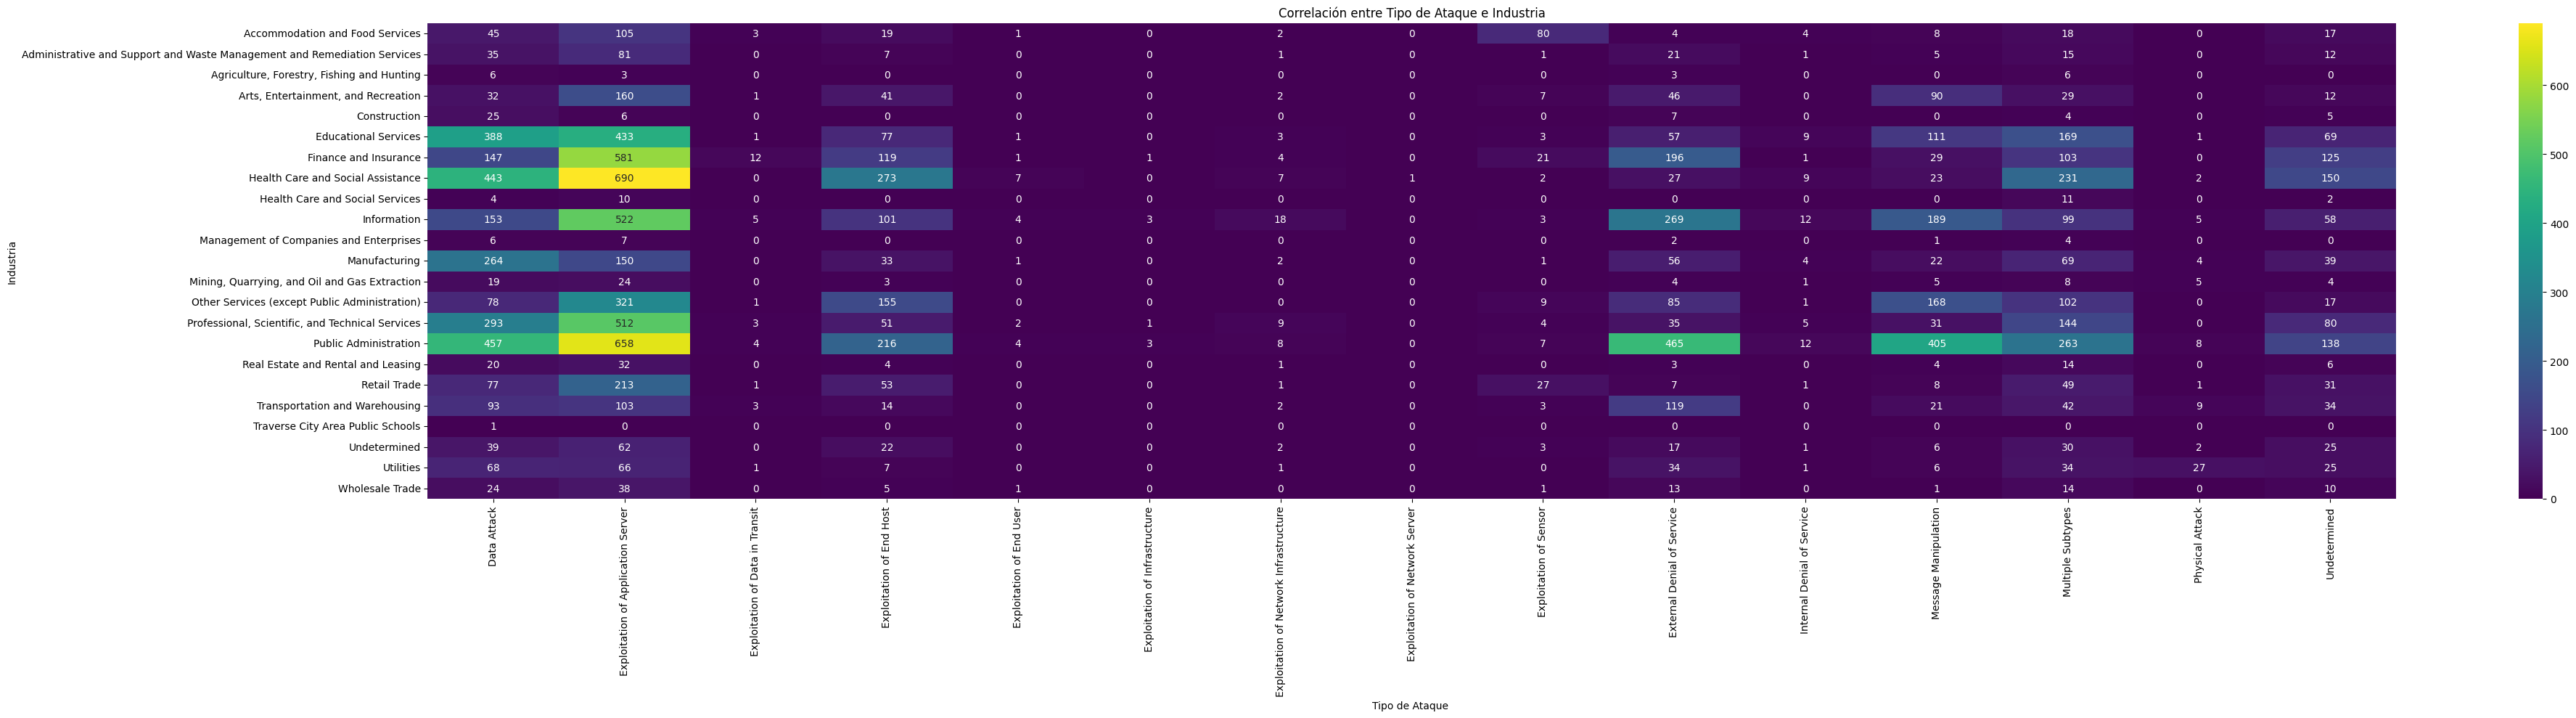

In [18]:

df['event_subtype'] = df['event_subtype'].replace(corrections)

# Función para agrupar subtipos de eventos
def group_event_subtype(subtype):
    if ',' in subtype:
        return 'Multiple Subtypes'
    return subtype

#  Aplicar la función de agrupación
df['event_subtype_grouped'] = df['event_subtype'].apply(group_event_subtype)

# Agrupar datos e industria
attacks_by_type_industry = df.groupby(['event_subtype_grouped', 'industry']).size().reset_index(name='count')

# Crear tabla pivote
pivot_table = attacks_by_type_industry.pivot(index='industry', columns='event_subtype_grouped', values='count').fillna(0)

# Asegurar que los valores sean enteros
pivot_table = pivot_table.astype(int)

# Crear el heatmap
plt.figure(figsize=(40, 10))  # Ajusta el tamaño según tus necesidades
sns.heatmap(data=pivot_table, cmap='viridis', annot=True, fmt='d')
plt.title('Correlación entre Tipo de Ataque e Industria')
plt.xlabel('Tipo de Ataque ')
plt.ylabel('Industria')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()


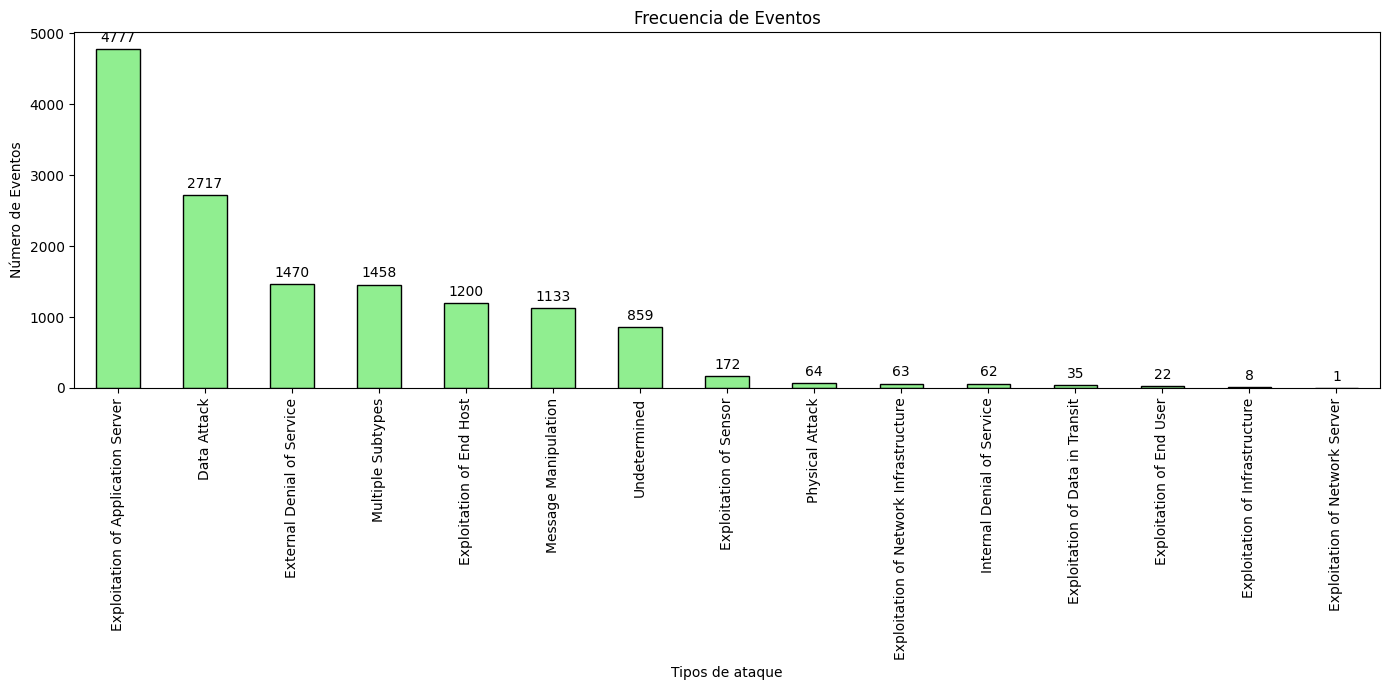

In [19]:
# Gráfico de Valores Agrupados Incluyendo "Multiple Subtypes" 
plt.figure(figsize=(14, 7))
bars = grouped_event_subtype_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frecuencia de Eventos')
plt.xlabel('Tipos de ataque')
plt.ylabel('Número de Eventos')

# Añadir anotaciones encima de cada barra
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

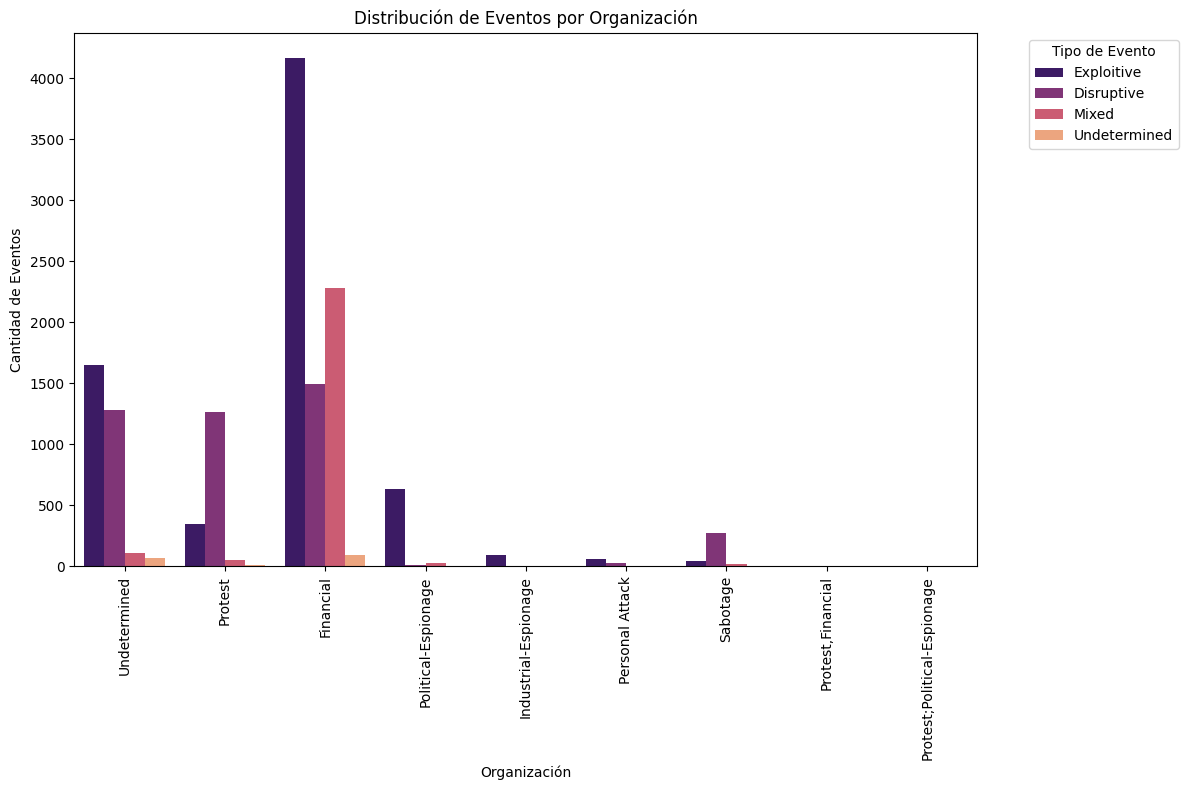

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='motive', hue='event_type', palette='magma')
plt.title('Distribución de Eventos por Organización')
plt.xlabel('Organización')
plt.ylabel('Cantidad de Eventos')
plt.legend(title='Tipo de Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Leba\AppData\Local\Temp\ipykernel_14468\787266844.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Porcentaje', y='Actor', data=data, palette='magma')


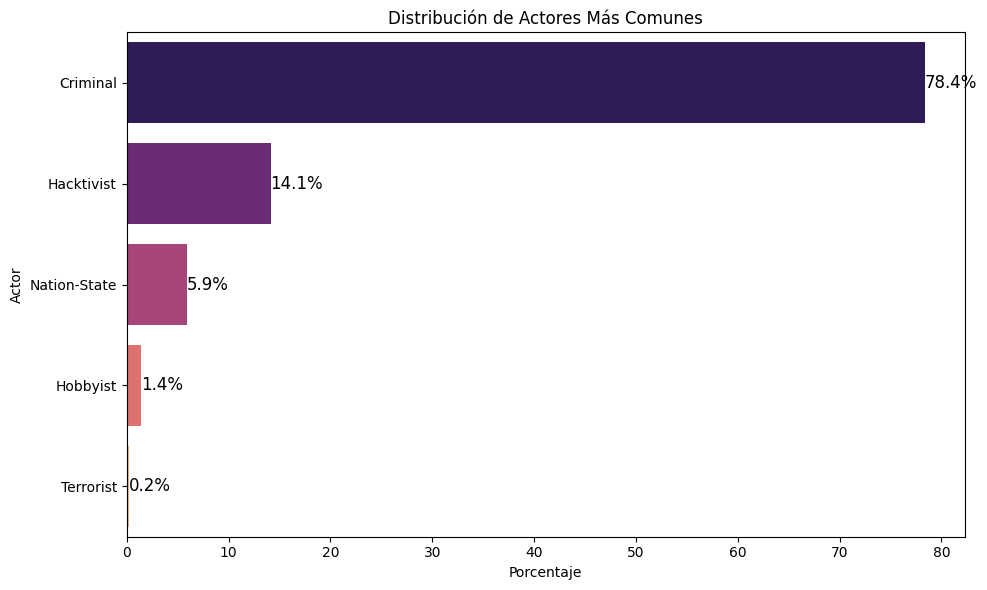

In [21]:
# Filtrar datos excluyendo "Undetermined"
df_filtrado = df[df['actor_type'] != 'Undetermined']

# Contar los actores más comunes
actores_comunes = df_filtrado['actor_type'].value_counts().head(10)

# Crear una lista de etiquetas y valores
labels = actores_comunes.index
valores = actores_comunes.values

# Crear el DataFrame para plotear
data = pd.DataFrame({
    'Actor': labels,
    'Cantidad': valores
})

# Calcular porcentajes
data['Porcentaje'] = (data['Cantidad'] / data['Cantidad'].sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Porcentaje', y='Actor', data=data, palette='magma')
plt.title('Distribución de Actores Más Comunes')
plt.xlabel('Porcentaje')
plt.ylabel('Actor')

# Mostrar los porcentajes en las barras
for index, value in enumerate(data['Porcentaje']):
    plt.text(value, index, f'{value:.1f}%', va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\Leba\AppData\Local\Temp\ipykernel_14468\3549782482.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_attack_counts, x='Industry', y='Number of Attacks', palette='viridis')


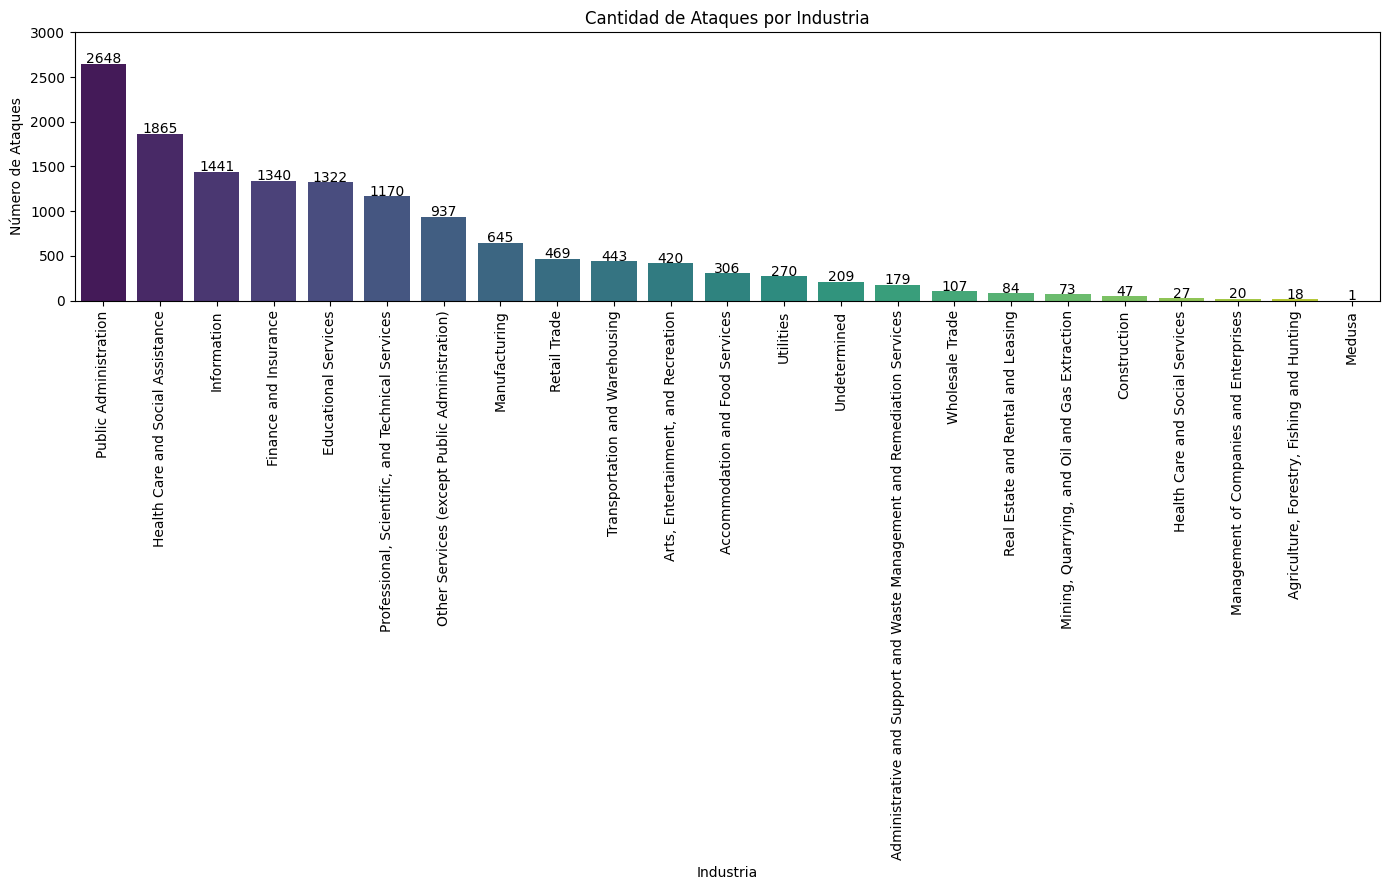

In [22]:
# Identificar el ID específico
id_especifico = 'A136183AE5ED5D7D'

# Intercambiar los valores de las columnas 'organization' e 'industry' para el ID específico
mask = df['id'] == id_especifico
df.loc[mask, ['organization', 'industry']] = df.loc[mask, ['industry', 'organization']].values


# Contar la cantidad de ataques por industria
industry_attack_counts = df.groupby('industry')['event_subtype_grouped'].count().sort_values(ascending=False).reset_index()
industry_attack_counts.columns = ['Industry', 'Number of Attacks']

# Gráfico de Ataques por Industria
plt.figure(figsize=(14, 9))
sns.barplot(data=industry_attack_counts, x='Industry', y='Number of Attacks', palette='viridis')
plt.title('Cantidad de Ataques por Industria')
plt.xlabel('Industria')
plt.ylabel('Número de Ataques')
plt.ylim(0, 3000)
plt.xticks(rotation=90)
for i in range(len(industry_attack_counts)):
    plt.text(i, industry_attack_counts['Number of Attacks'][i] + 50, int(industry_attack_counts['Number of Attacks'][i]), ha='center', va='center')
plt.tight_layout()
plt.show()

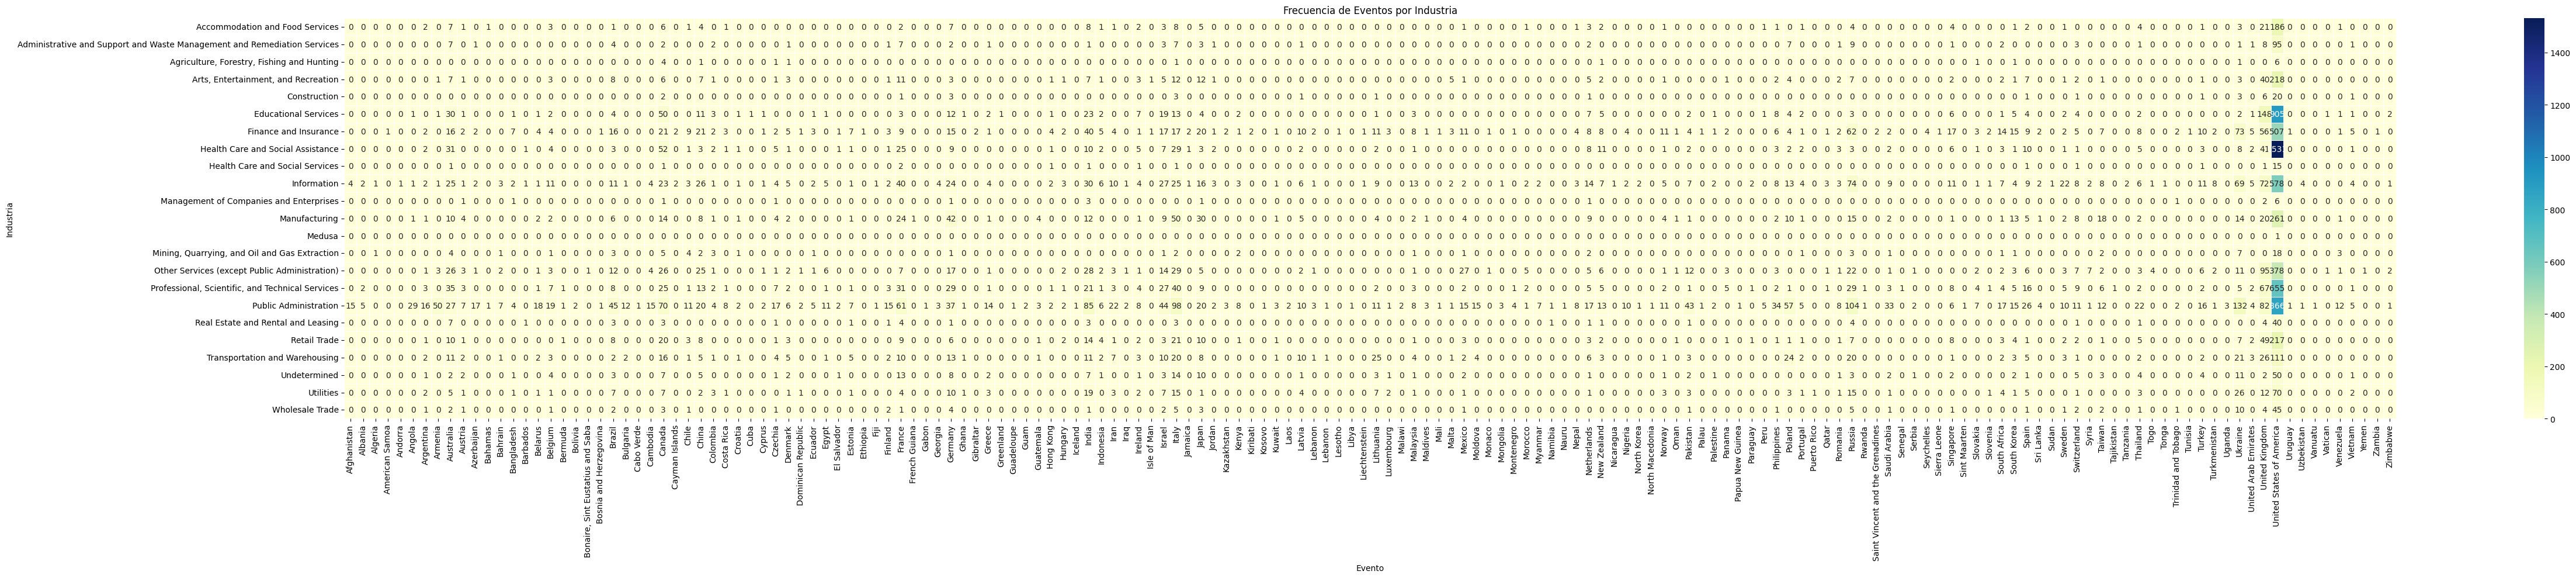

In [23]:
plt.figure(figsize=(50, 10))
industry_country = pd.crosstab(df['industry'], df['country'])

# Crear un heatmap con la tabla de frecuencias
sns.heatmap(industry_country, cmap='YlGnBu', annot=True, fmt="d", cbar=True, linewidths=0.5)

# Título y etiquetas
plt.title('Frecuencia de Eventos por Industria')
plt.xlabel('Evento')
plt.ylabel('Industria')

plt.tight_layout()
plt.show()

C:\Users\Leba\AppData\Local\Temp\ipykernel_14468\3748119784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paises_actores.index[:20], y=paises_actores.values[:20], palette='coolwarm')


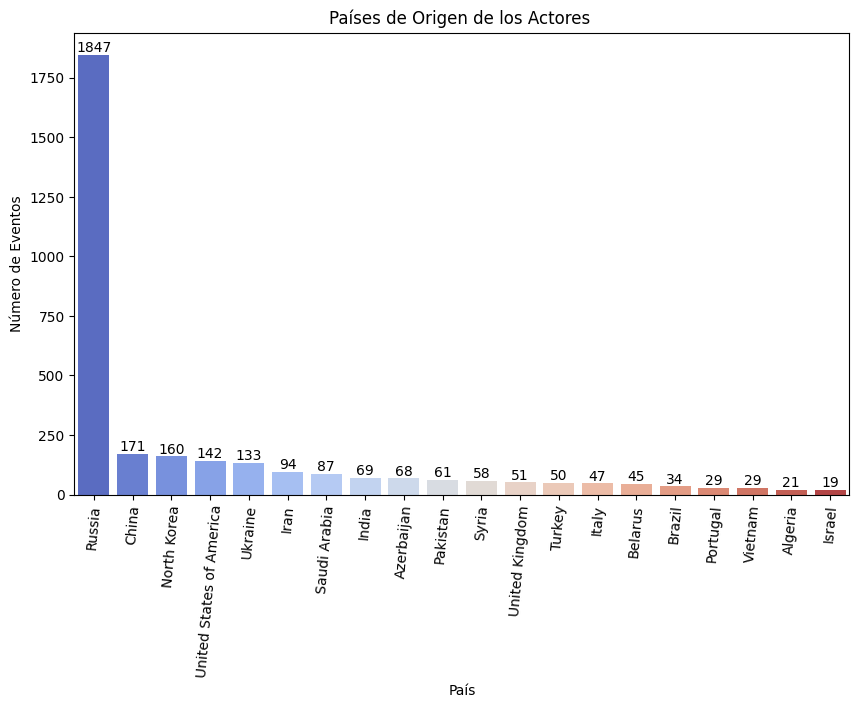

In [24]:
# Visualizar los países de origen de los actores (Top 10, Excluyendo "Undetermined")

# Filtrar los datos para excluir "Undetermined"
paises_filtrados = df[df['attacking_country'] != 'Undetermined']

# Agrupar por país de los actores y contar la cantidad de eventos
paises_actores = paises_filtrados['attacking_country'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=paises_actores.index[:20], y=paises_actores.values[:20], palette='coolwarm')

# Agregar el conteo sobre cada barra (ajustando la posición)
for i in range(len(paises_actores.index[:20])):
    plt.text(i, paises_actores.values[i] + 0.2, str(paises_actores.values[i]), ha='center', va='bottom')

plt.title('Países de Origen de los Actores ')
plt.xlabel('País')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=85)
plt.show()

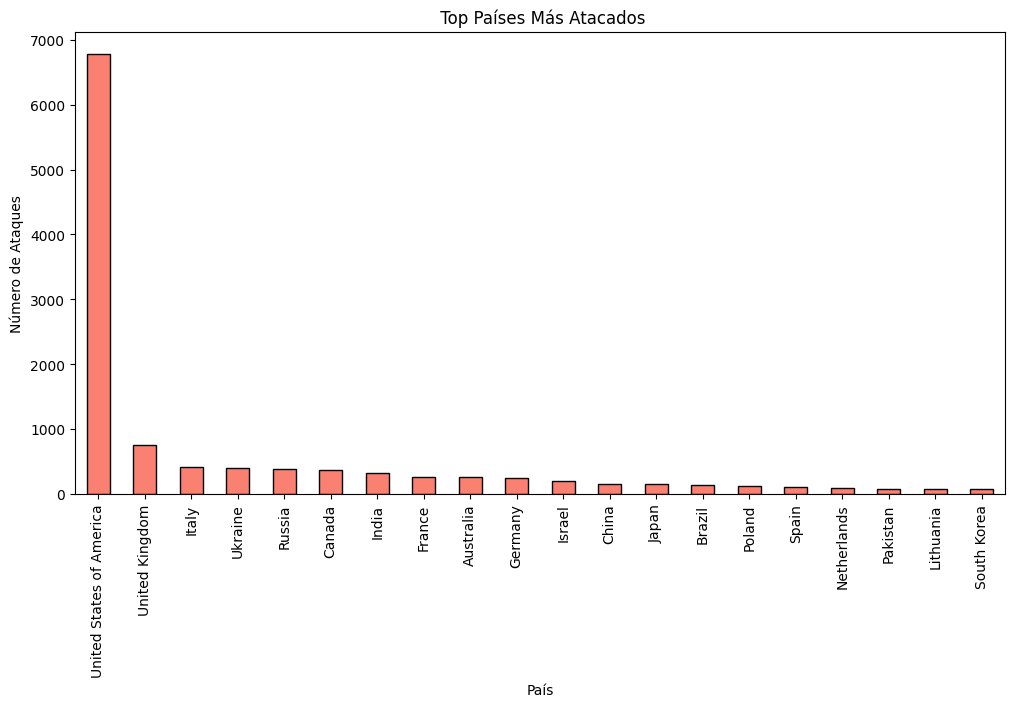

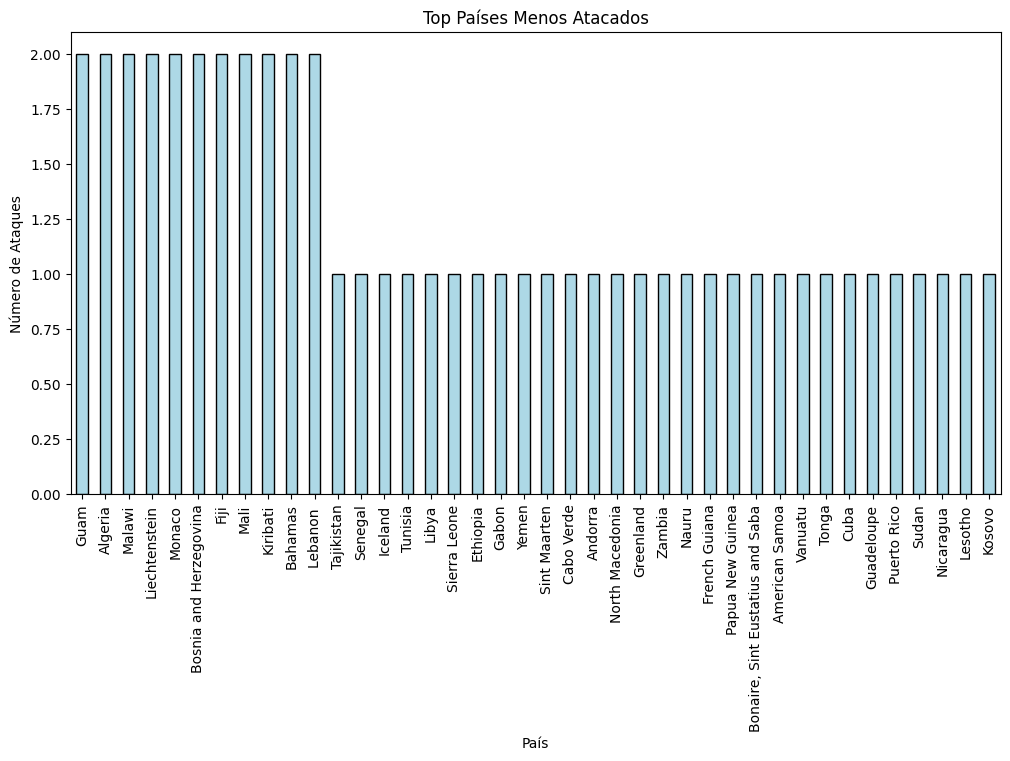

In [25]:
# 1. Top 10 países más y menos atacados
top_countries = df['country'].value_counts()
plt.figure(figsize=(12, 6))
top_countries.head(20).plot(kind='bar', color='salmon', edgecolor='black')
plt.title(' Top Países Más Atacados')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.show()

plt.figure(figsize=(12, 6))
top_countries.tail(40).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top Países Menos Atacados')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.show()

C:\Users\Leba\AppData\Local\Temp\ipykernel_14468\3943955449.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=filtered_df, x='year', palette='viridis', order=years_order)


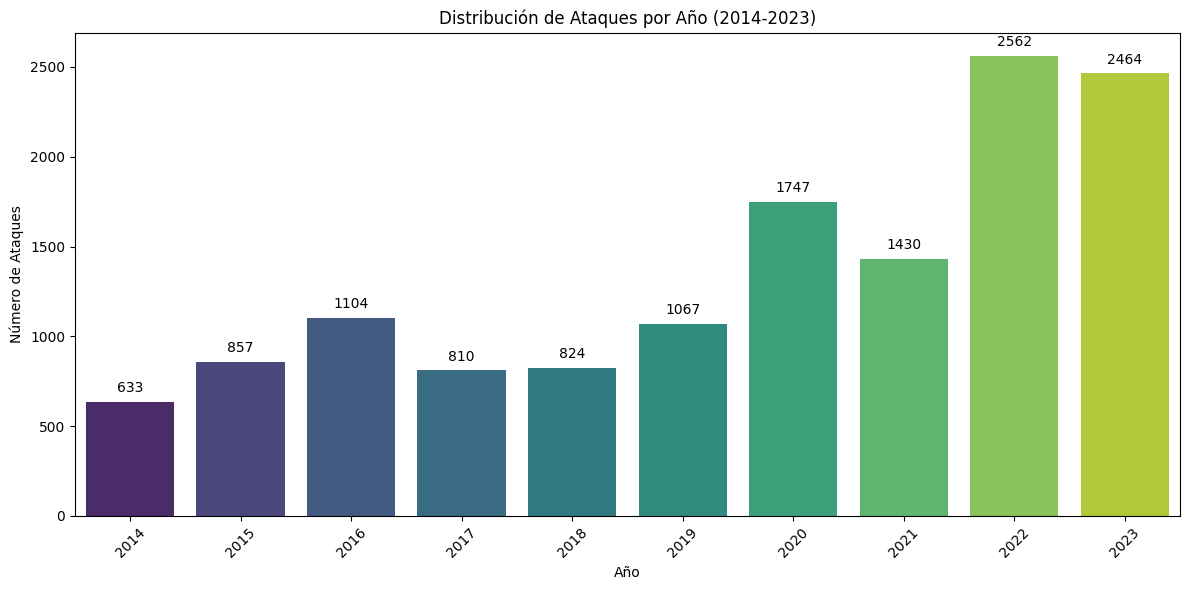

In [26]:
# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Asegurarse de que no haya valores nulos en la columna 'date'
df = df.dropna(subset=['date'])

# Extraer el año y el mes
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)







# Extraer el año y el mes
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)

# Filtrar los datos para incluir solo los años de 2014 a 2023
filtered_df = df[(df['year'] >= 2014) & (df['year'] <= 2023)]

# Ordenar los años de manera secuencial de 2014 a 2023
years_order = list(range(2014, 2023 + 1))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.countplot(data=filtered_df, x='year', palette='viridis', order=years_order)

# Añadir anotaciones a las barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Distribución de Ataques por Año (2014-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Ataques')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

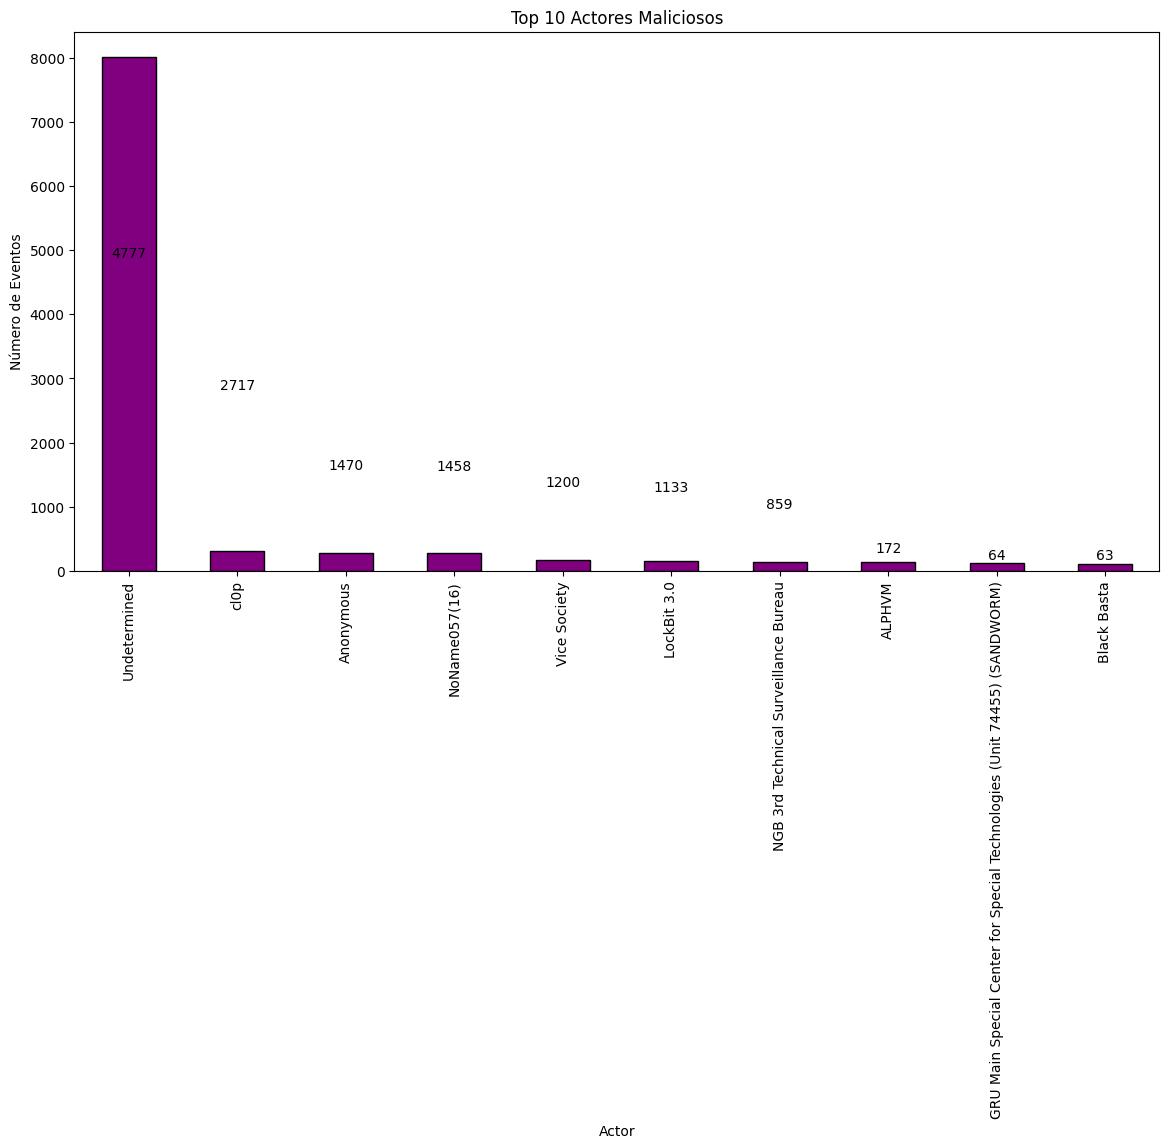

In [27]:
# 5. Actores maliciosos más frecuentes
plt.figure(figsize=(14, 7))
actor_counts = df['actor'].value_counts()
actor_counts.head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Actores Maliciosos')
plt.xlabel('Actor')
plt.ylabel('Número de Eventos')
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points')
plt.show()

In [1053]:
csv_countries = set(filtered_df['attacking_country'].unique()).union(set(filtered_df['country'].unique()))
shapefile_countries = set(world['NAME'].unique())

# Países que están en el CSV pero no en el shapefile
mismatch = csv_countries - shapefile_countries
print("Países que no coinciden:", mismatch)


Países que no coinciden: {'Liechtenstein', 'Vatican', 'Nauru', 'Monaco', 'Gibraltar', None, 'Tonga', 'Hong Kong', 'Cayman Islands', 'Seychelles', 'Maldives', 'Sint Maarten', 'Singapore', 'Palau', 'Isle of Man', 'Dominican Republic', 'Cabo Verde', 'French Guiana', 'Kiribati', 'Bahrain', 'Bosnia and Herzegovina', 'Bermuda', 'Andorra', 'Guadeloupe', 'Saint Vincent and the Grenadines', 'Bonaire, Sint Eustatius and Saba', 'Malta', 'American Samoa', 'Barbados', 'Guam'}


In [1054]:
# Correcciones de nombres de países
name_corrections = {
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Syrian Arab Republic": "Syria",
    "Korea (the Republic of)": "South Korea",
    "Russian Federation": "Russia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Iran (Islamic Republic of)": "Iran",
    "Taiwan (Province of China)": "Taiwan",
    "Viet Nam": "Vietnam",
    "Holy See": "Vatican",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Tanzania, United Republic of": "Tanzania",
    "Islamic Republic of Iran": "Iran",
    "Korea (the Democratic People's Republic of)": "North Korea",
    "Czech Republic": "Czechia",
    "Palestine, State of": "Palestine",
    "Lao People's Democratic Republic": "Laos",
    "Hong Kong": "Hong Kong",
    "Multiple": None,
    "European Union": None
}
df['country'] = df['country'].replace(name_corrections)
df['attacking_country'] = df['attacking_country'].replace(name_corrections)

Media de ataques recibidos por país: 83.26829268292683


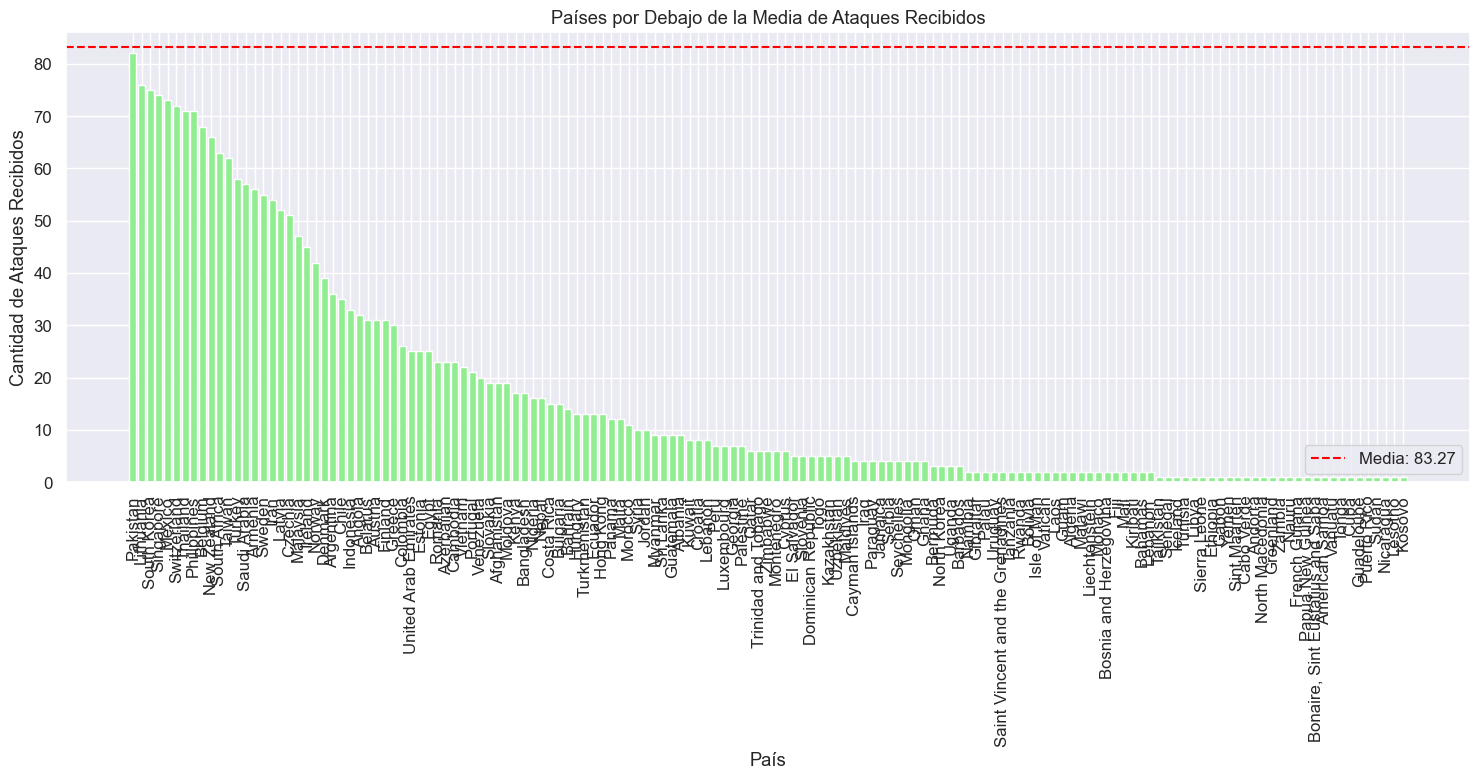

In [1055]:
#Filtrar los datos, excluyendo "Undetermined"
filtered_df = df[(df['country'] != "Undetermined") & (df['attacking_country'] != "Undetermined")]

# Contar el número de ataques por país (atacados)
attacks_received_by_country = filtered_df['country'].value_counts().reset_index()
attacks_received_by_country.columns = ['country', 'received_attack_count']

# Calcular la media de ataques recibidos por país
mean_received_attack_count = attacks_received_by_country['received_attack_count'].mean()

print(f"Media de ataques recibidos por país: {mean_received_attack_count}")

# Identificar los países que están por debajo de la media de ataques recibidos
countries_below_mean_received = attacks_received_by_country[attacks_received_by_country['received_attack_count'] < mean_received_attack_count]

# Visualizar los resultados
plt.figure(figsize=(15, 8))
plt.bar(countries_below_mean_received['country'], countries_below_mean_received['received_attack_count'], color='lightgreen')
plt.axhline(mean_received_attack_count, color='red', linestyle='--', label=f'Media: {mean_received_attack_count:.2f}')
plt.title('Países por Debajo de la Media de Ataques Recibidos')
plt.xlabel('País')
plt.ylabel('Cantidad de Ataques Recibidos')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Media de ataques por país: 83.26829268292683


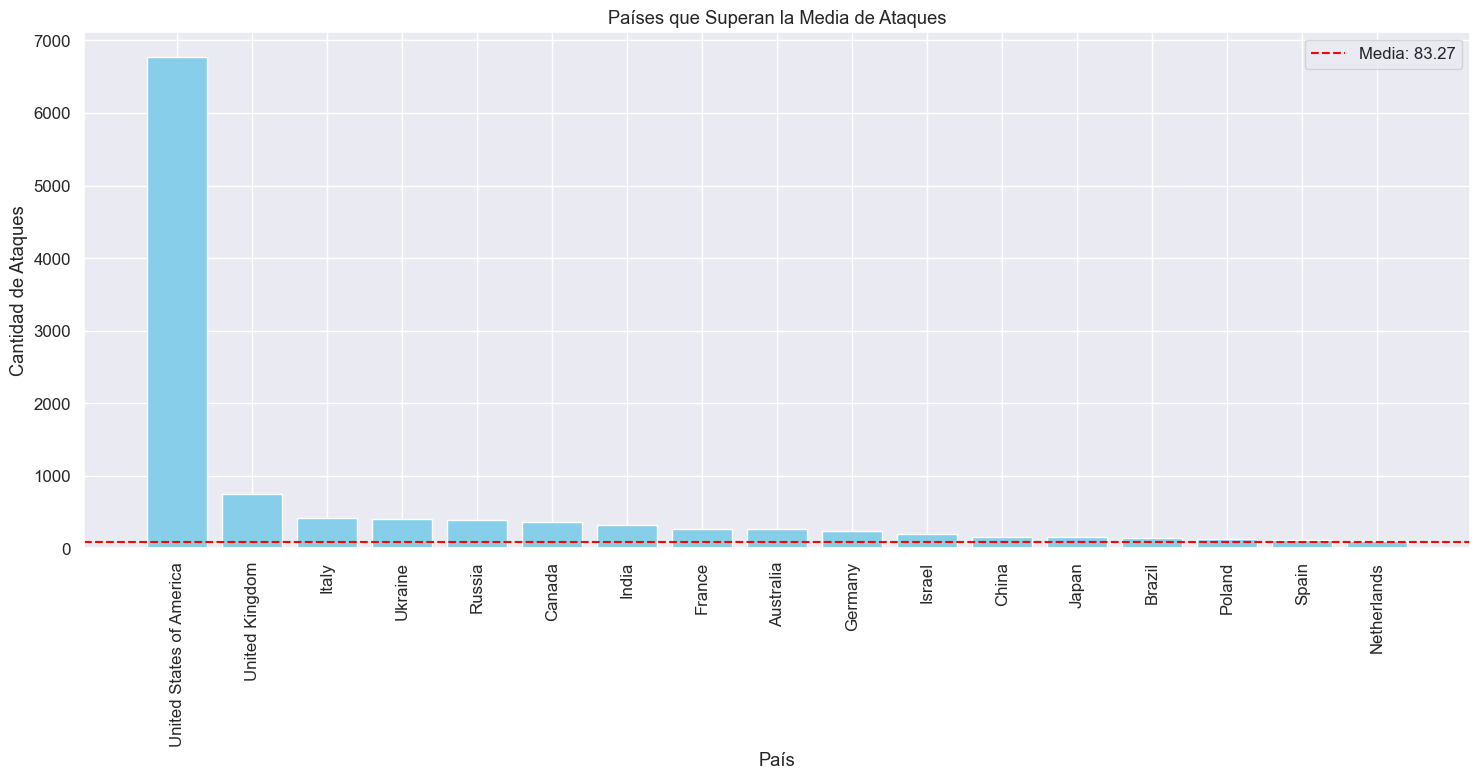

Países que superan la media de ataques:
                     country  attack_count
0   United States of America          6778
1             United Kingdom           756
2                      Italy           413
3                    Ukraine           407
4                     Russia           389
5                     Canada           363
6                      India           324
7                     France           264
8                  Australia           263
9                    Germany           244
10                    Israel           201
11                     China           161
12                     Japan           160
13                    Brazil           146
14                    Poland           130
15                     Spain           109
16               Netherlands            99


In [1056]:
# Contar el número de ataques por país
attacks_by_country = filtered_df['country'].value_counts().reset_index()
attacks_by_country.columns = ['country', 'attack_count']

# Calcular la media de ataques por país
mean_attack_count = attacks_by_country['attack_count'].mean()
print(f"Media de ataques por país: {mean_attack_count}")

# Identificar los países que superan la media de ataques
countries_above_mean = attacks_by_country[attacks_by_country['attack_count'] > mean_attack_count]

# Visualizar los resultados
plt.figure(figsize=(15, 8))
plt.bar(countries_above_mean['country'], countries_above_mean['attack_count'], color='skyblue')
plt.axhline(mean_attack_count, color='red', linestyle='--', label=f'Media: {mean_attack_count:.2f}')
plt.title('Países que Superan la Media de Ataques')
plt.xlabel('País')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Imprimir la lista de países que superan la media
print("Países que superan la media de ataques:")
print(countries_above_mean)

Media de ataques recibidos por país: 83.26829268292683
Media de ataques lanzados por país: 43.05


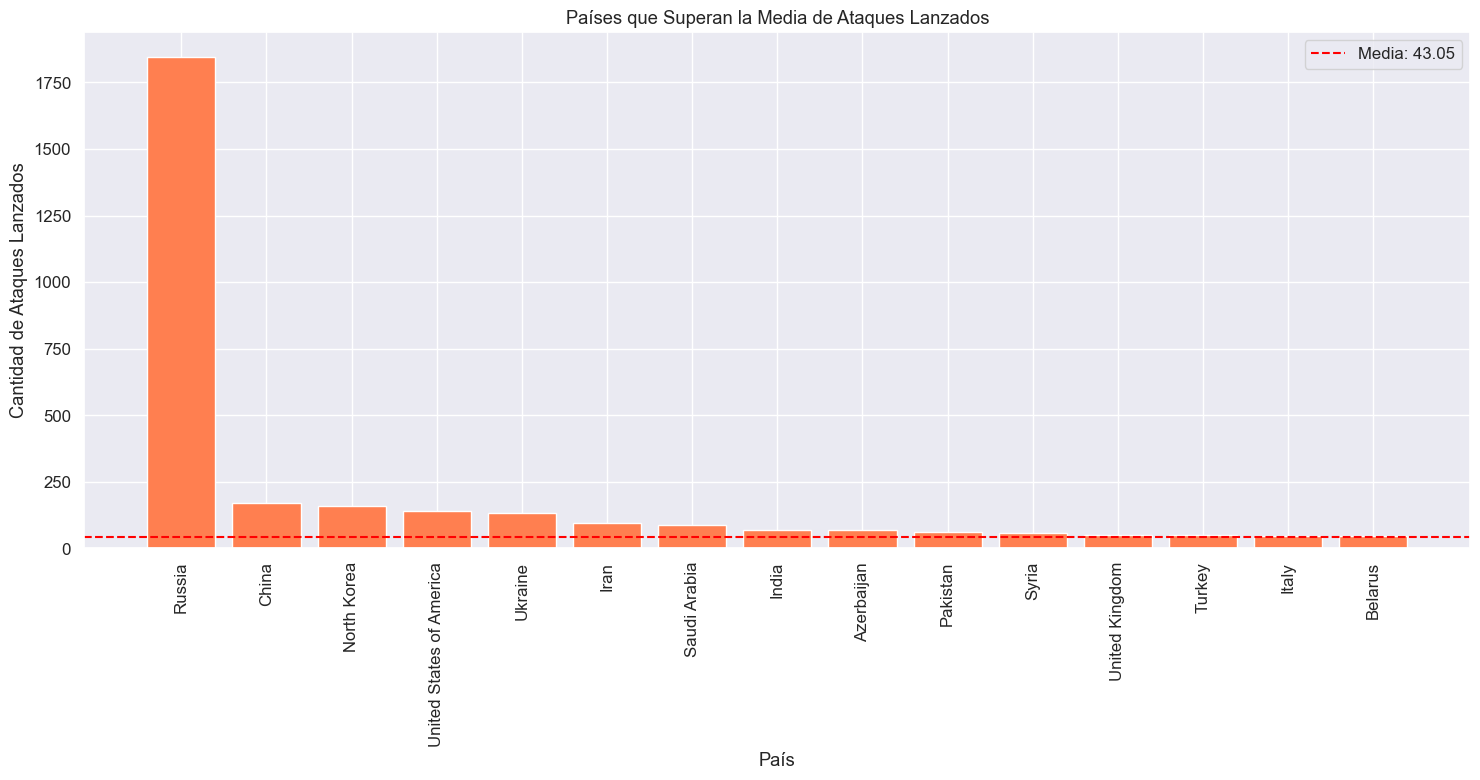

Países que superan la media de ataques lanzados:
                     country  launched_attack_count
0                     Russia                   1847
1                      China                    171
2                North Korea                    160
3   United States of America                    142
4                    Ukraine                    133
5                       Iran                     94
6               Saudi Arabia                     87
7                      India                     69
8                 Azerbaijan                     68
9                   Pakistan                     61
10                     Syria                     58
11            United Kingdom                     51
12                    Turkey                     50
13                     Italy                     47
14                   Belarus                     45


In [1057]:
# Contar el número de ataques por país (atacantes)
attacks_launched_by_country = filtered_df['attacking_country'].value_counts().reset_index()
attacks_launched_by_country.columns = ['country', 'launched_attack_count']

# Calcular la media de ataques por país (atacados y atacantes)

mean_launched_attack_count = attacks_launched_by_country['launched_attack_count'].mean()

print(f"Media de ataques recibidos por país: {mean_received_attack_count}")
print(f"Media de ataques lanzados por país: {mean_launched_attack_count}")

# Identificar los países que superan la media de ataques (atacados)
countries_above_mean_received = attacks_received_by_country[attacks_received_by_country['received_attack_count'] > mean_received_attack_count]

# Identificar los países que superan la media de ataques (atacantes)
countries_above_mean_launched = attacks_launched_by_country[attacks_launched_by_country['launched_attack_count'] > mean_launched_attack_count]



# Países que superan la media de ataques lanzados
plt.figure(figsize=(15, 8))
plt.bar(countries_above_mean_launched['country'], countries_above_mean_launched['launched_attack_count'], color='coral')
plt.axhline(mean_launched_attack_count, color='red', linestyle='--', label=f'Media: {mean_launched_attack_count:.2f}')
plt.title('Países que Superan la Media de Ataques Lanzados')
plt.xlabel('País')
plt.ylabel('Cantidad de Ataques Lanzados')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()




print("Países que superan la media de ataques lanzados:")
print(countries_above_mean_launched)

Media de ataques por año (hasta 2023): 1276.2727272727273


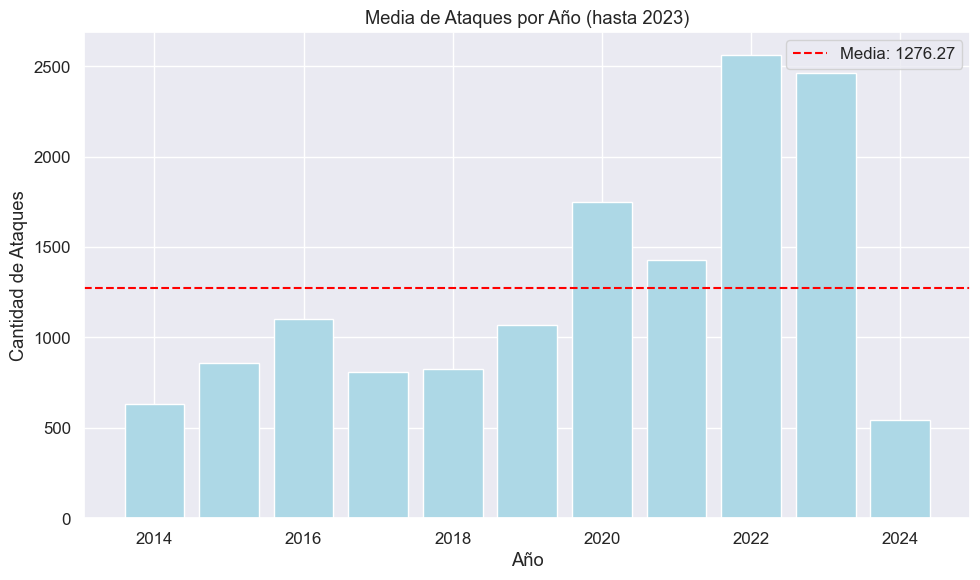

In [1058]:
# Extraer el año
df['year'] = df['date'].dt.year

# Contar el número de ataques por año
attacks_by_year = df['year'].value_counts().reset_index()
attacks_by_year.columns = ['year', 'attack_count']



# Calcular la media de ataques por año
mean_attack_count_per_year = attacks_by_year['attack_count'].mean()
print(f"Media de ataques por año (hasta 2023): {mean_attack_count_per_year}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(attacks_by_year['year'], attacks_by_year['attack_count'], color='lightblue')
plt.axhline(mean_attack_count_per_year, color='red', linestyle='--', label=f'Media: {mean_attack_count_per_year:.2f}')
plt.title('Media de Ataques por Año (hasta 2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ataques')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Leba\AppData\Local\Temp\ipykernel_9776\3051060626.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




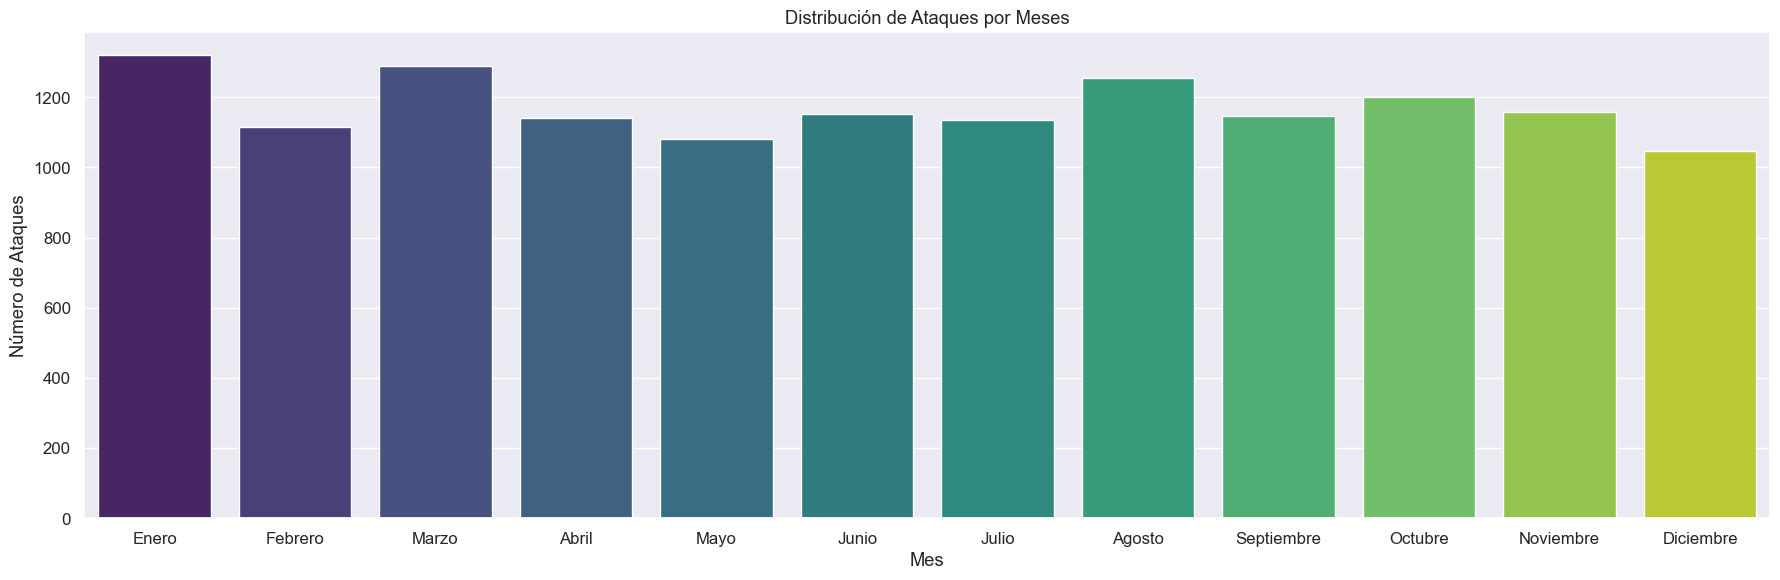

In [1059]:

# Contar el número de ataques por mes
attacks_by_month = df['month'].value_counts().reset_index()
attacks_by_month.columns = ['month', 'attack_count']
attacks_by_month = attacks_by_month.sort_values(by='month')

# Visualizar la distribución de ataques por mes
plt.figure(figsize=(18, 6))
sns.barplot(data=attacks_by_month, x='month', y='attack_count', palette='viridis')
plt.title('Distribución de Ataques por Meses')
plt.xlabel('Mes')
plt.ylabel('Número de Ataques')
plt.xticks(range(12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.tight_layout()
plt.show()

C:\Users\Leba\AppData\Local\Temp\ipykernel_9776\3636769638.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Leba\AppData\Local\Temp\ipykernel_9776\3636769638.py:24: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



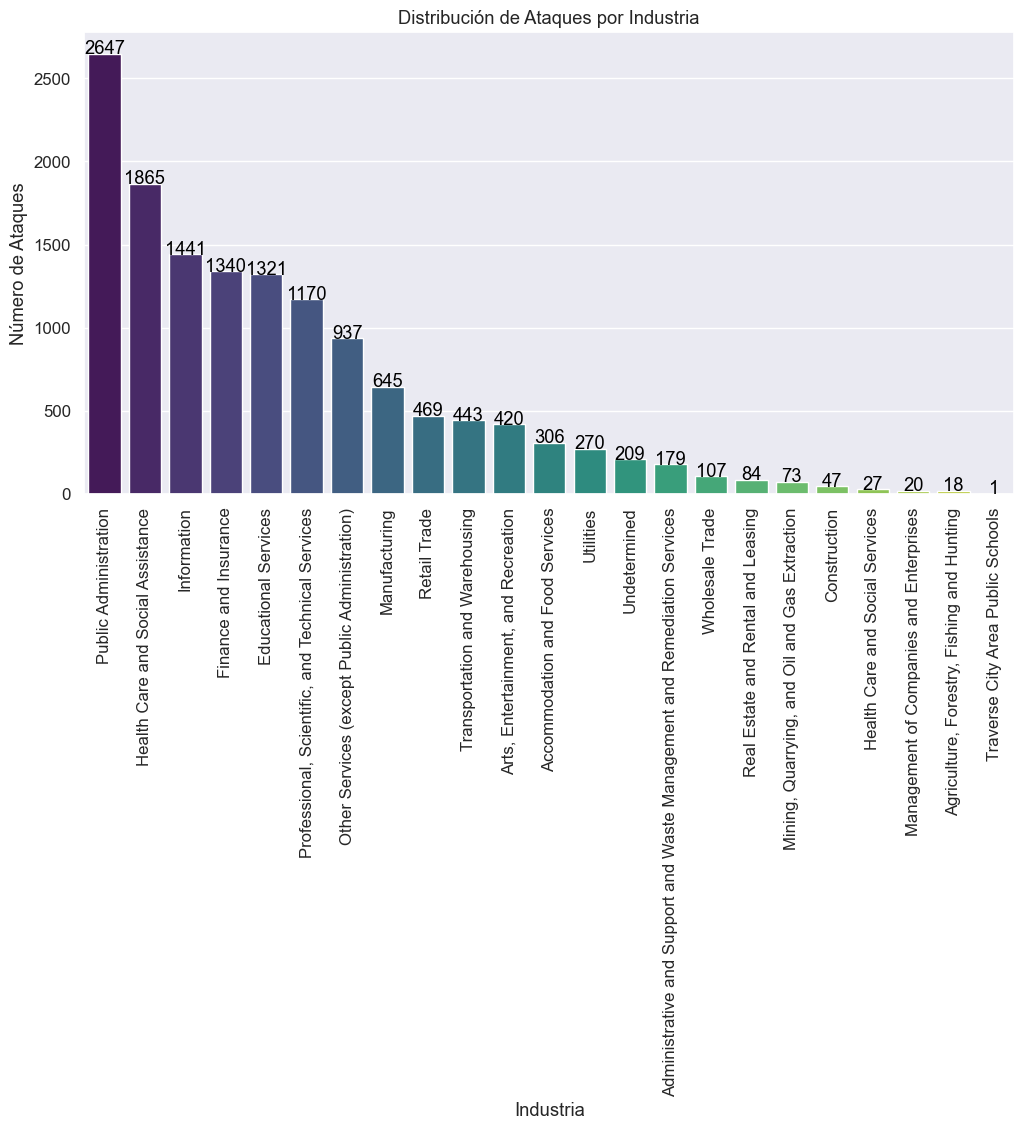

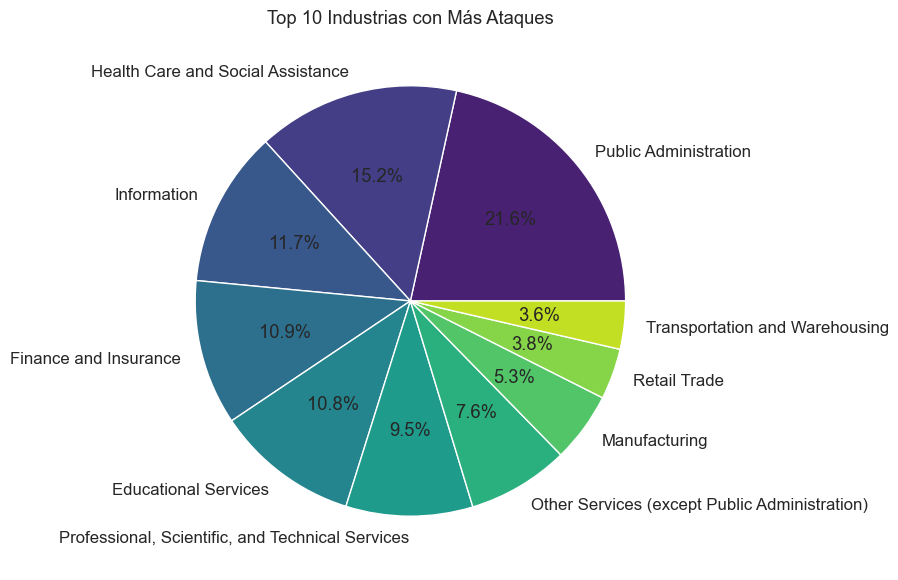

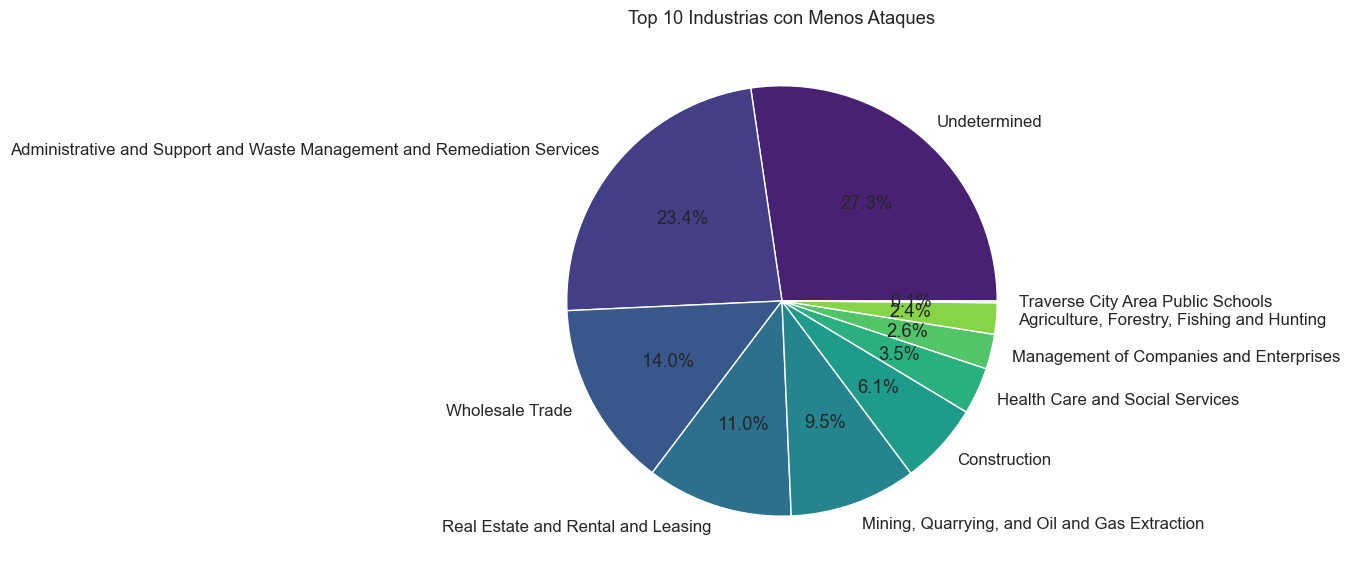

In [1060]:

# Identificar el ID específico
id_especifico = 'A136183AE5ED5D7D'

# Intercambiar los valores de las columnas 'organization' e 'industry' para el ID específico
mask = df['id'] == id_especifico
df.loc[mask, ['organization', 'industry']] = df.loc[mask, ['industry', 'organization']].values

# Contar el número de ataques por industria
attacks_by_industry = df['industry'].value_counts().reset_index()
attacks_by_industry.columns = ['industry', 'attack_count']

# Visualizar la distribución de ataques por industria
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=attacks_by_industry, x='industry', y='attack_count', palette='viridis')

# Añadir anotaciones a las barras
for index, row in attacks_by_industry.iterrows():
    barplot.text(row.name, row.attack_count, row.attack_count, color='black', ha="center")

plt.title('Distribución de Ataques por Industria')
plt.xlabel('Industria')
plt.ylabel('Número de Ataques')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Filtrar el top 10 de industrias con más ataques
top_10_industries = attacks_by_industry.head(10)

# Visualizar la distribución de ataques por industria en un gráfico circular
plt.figure(figsize=(12, 6))
plt.pie(top_10_industries['attack_count'], labels=top_10_industries['industry'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_10_industries)))

plt.title('Top 10 Industrias con Más Ataques')
plt.tight_layout()
plt.show()

# Filtrar el top 10 de industrias con menos ataques
bottom_10_industries = attacks_by_industry.tail(10)

# Visualizar la distribución de ataques por industria en un gráfico circular
plt.figure(figsize=(12, 6))
plt.pie(bottom_10_industries['attack_count'], labels=bottom_10_industries['industry'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(bottom_10_industries)))

plt.title('Top 10 Industrias con Menos Ataques')
plt.tight_layout()
plt.show()

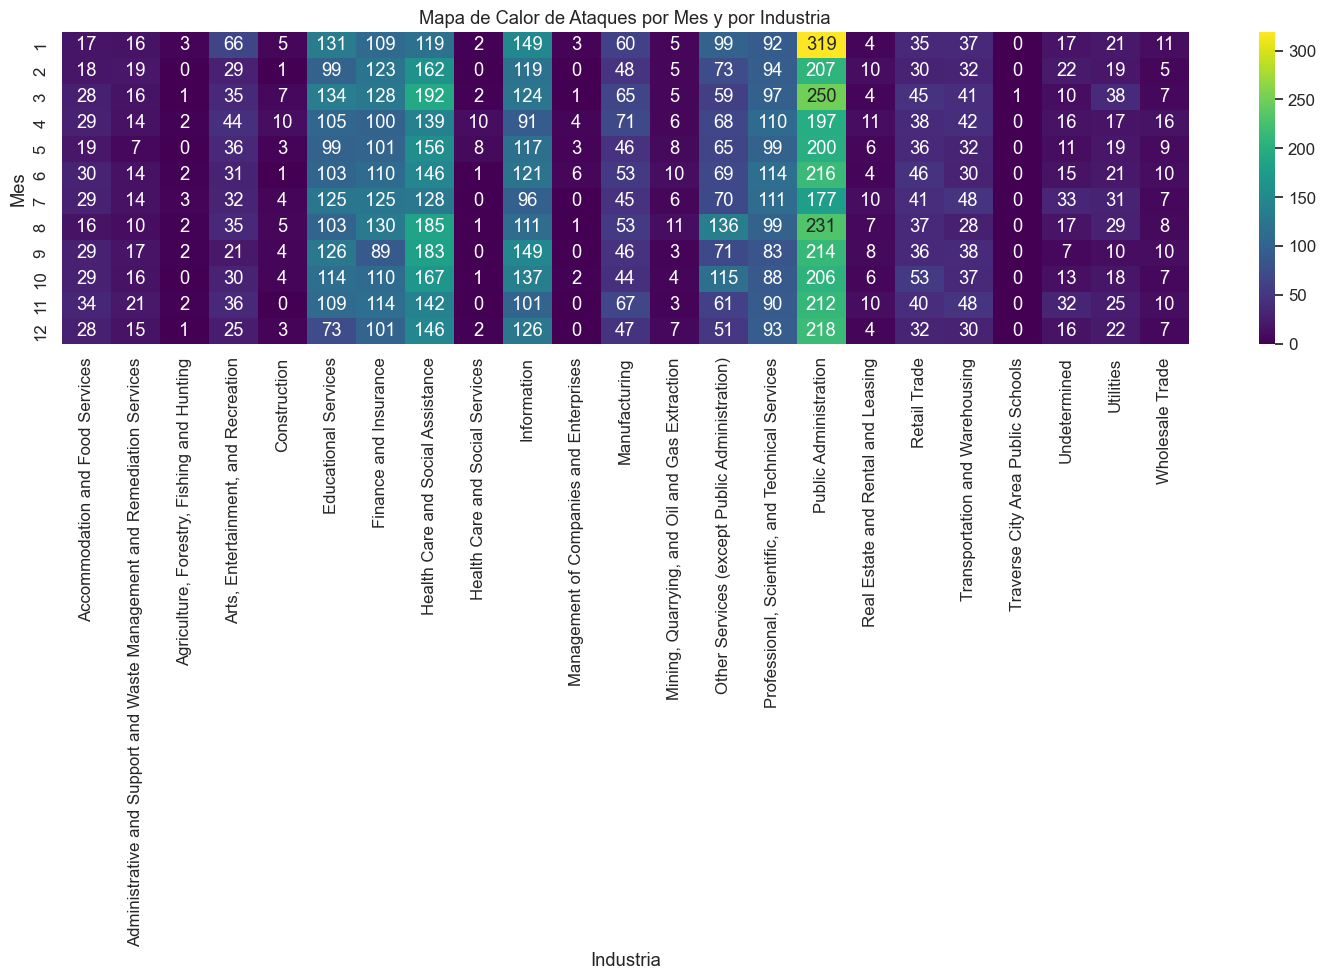

In [1061]:
# Contar el número de ataques por mes e industria
attacks_by_month_industry = df.groupby(['month', 'industry']).size().reset_index(name='count')

# Pivotar los datos para obtener un formato adecuado para un gráfico de calor
attacks_by_month_industry_pivot = attacks_by_month_industry.pivot(index="month", columns="industry", values="count").fillna(0)

# Crear un gráfico de calor para visualizar los ataques por mes e industria
plt.figure(figsize=(15, 10))
sns.heatmap(data=attacks_by_month_industry_pivot, cmap='viridis', annot=True, fmt='.0f')
plt.title('Mapa de Calor de Ataques por Mes y por Industria')
plt.xlabel('Industria')
plt.ylabel('Mes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

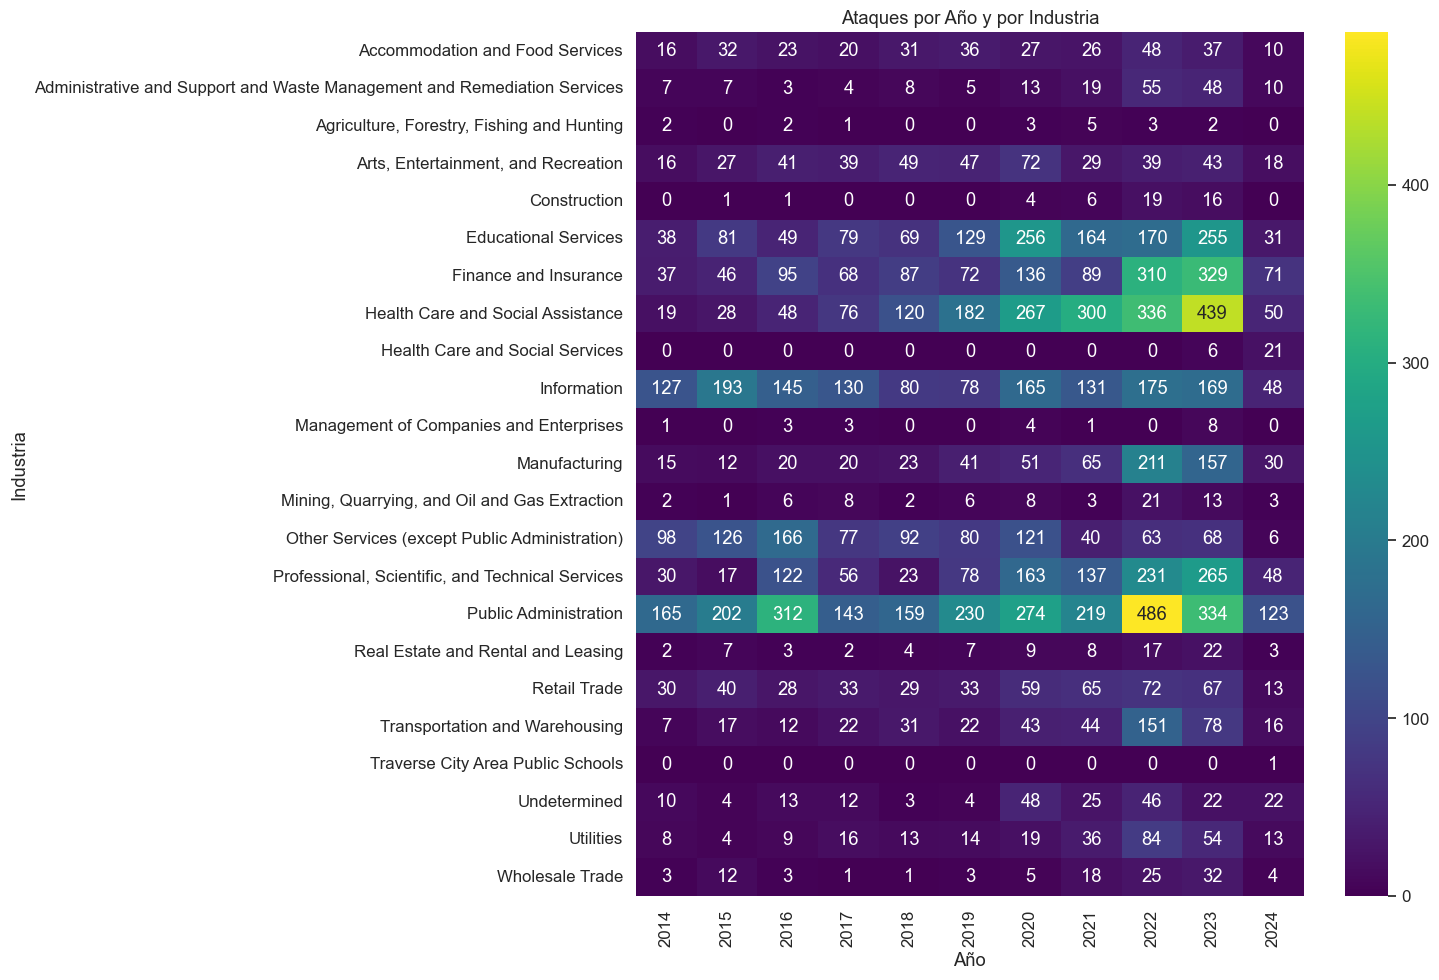

In [1062]:
# Contar el número de ataques por año e industria
attacks_by_year_industry = df.groupby(['year', 'industry']).size().reset_index(name='count')

attacks_by_year_industry_pivot = attacks_by_year_industry.pivot(index='industry', columns='year', values='count').fillna(0)

attacks_by_year_industry_pivot = attacks_by_year_industry_pivot.astype(int)

# Crear el gráfico de calor
plt.figure(figsize=(15, 10))
sns.heatmap(data=attacks_by_year_industry_pivot, cmap='viridis', annot=True, fmt='.0f')
plt.title('Ataques por Año y por Industria')
plt.xlabel('Año')
plt.ylabel('Industria')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1074]:
from io import BytesIO
import base64


csv_path = r'D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\sprint10.csv'
shapefile_path = r'D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'

df = pd.read_csv(csv_path)
world = gpd.read_file(shapefile_path)

# Correcciones de nombres
name_corrections = {
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Syrian Arab Republic": "Syria",
    "Korea (the Republic of)": "South Korea",
    "Russian Federation": "Russia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Iran (Islamic Republic of)": "Iran",
    "Taiwan (Province of China)": "Taiwan",
    "Viet Nam": "Vietnam",
    "Holy See": "Vatican",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Tanzania, United Republic of": "Tanzania",
    "Islamic Republic of Iran": "Iran",
    "Korea (the Democratic People's Republic of)": "North Korea",
    "Czech Republic": "Czechia",
    "Palestine, State of": "Palestine",
    "Lao People's Democratic Republic": "Laos",
    "Hong Kong": "Hong Kong",
    "Multiple": None,
    "European Union": None
}
df['country'] = df['country'].replace(name_corrections)
df['attacking_country'] = df['attacking_country'].replace(name_corrections)

# Conteo de ataques
received_counts = df['country'].value_counts().reset_index()
received_counts.columns = ['country', 'received_attacks']

launched_counts = df['attacking_country'].value_counts().reset_index()
launched_counts.columns = ['country', 'launched_attacks']

# Fusionar con shapefile
world = world.merge(received_counts, how="left", left_on="NAME", right_on="country")
world = world.merge(launched_counts, how="left", left_on="NAME", right_on="country", suffixes=('_received', '_launched'))

# Categorías de colores
max_received = world.loc[world['received_attacks'].idxmax(), 'NAME']
max_launched = world.loc[world['launched_attacks'].idxmax(), 'NAME']

def determine_category(row):
    if row['NAME'] == max_received:
        return 'max_received'
    elif row['NAME'] == max_launched:
        return 'max_launched'
    elif pd.notna(row['received_attacks']) and pd.notna(row['launched_attacks']):
        return 'both'
    elif pd.notna(row['received_attacks']):
        return 'received'
    elif pd.notna(row['launched_attacks']):
        return 'launched'
    else:
        return 'none'

world['category'] = world.apply(determine_category, axis=1)

color_map = {
    'max_received': '#FF6666',
    'max_launched': '#FF9933',
    'both': '#A8D5BA',
    'received': '#FFEE99',
    'launched': '#CFA3FF',
    'none': '#D3D3D3'
}

world['color'] = world['category'].map(color_map)

# Crear mapa interactivo
m = folium.Map(location=[20, 0], zoom_start=2)

def style_function(feature):
    color = feature['properties']['color']
    return {'fillColor': color, 'color': 'black', 'fillOpacity': 0.7, 'weight': 0.5}

geojson = folium.GeoJson(
    world,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'received_attacks', 'launched_attacks'],
        aliases=['Country', 'Received Attacks', 'Launched Attacks'],
        localize=True
    )
)
geojson.add_to(m)

def create_heatmap(country_data, country_name):
    if country_data.empty:
        return "No data for this country"

    country_data['date'] = pd.to_datetime(country_data['date'])
    country_data['year'] = country_data['date'].dt.year
    country_data['month'] = country_data['date'].dt.month

    heatmap_data = country_data.groupby(['year', 'month', 'industry']).size().unstack(level=2, fill_value=0)

    if heatmap_data.empty:
        return "No heatmap data available"

    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(heatmap_data, cmap="YlGnBu", ax=ax)
    plt.title(f"Cyberattacks in {country_name} by Month, Year, and Industry")
    plt.xlabel("Industry")
    plt.ylabel("Month and Year")

    img_buf = BytesIO()
    plt.savefig(img_buf, format='png', bbox_inches='tight')
    img_buf.seek(0)
    img_png = img_buf.getvalue()
    img_b64 = base64.b64encode(img_png).decode('utf-8')
    plt.close(fig)

    # Obtener el tamaño del gráfico despues de guardar
    img = plt.imread(img_buf)
    height, width, _ = img.shape

    return f'<img src="data:image/png;base64,{img_b64}" alt="Heatmap">', width, height

for _, row in world.iterrows():
    if pd.notna(row['received_attacks']) or pd.notna(row['launched_attacks']):
        country_name = row['NAME']
        country_attacks = df[(df['country'] == country_name) | (df['attacking_country'] == country_name)]

        heatmap_html, width, height = create_heatmap(country_attacks, country_name)

        # Ajustar el tamaño del iframe al del gráfico
        iframe = folium.IFrame(heatmap_html, width=width + 20, height=height + 20)
        popup = folium.Popup(iframe, max_width=2650)

        # Marcador 
        folium.CircleMarker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            radius=5,
            color="black",
            fill=True,
            fill_color="black",
            fill_opacity=0.5,  
            popup=popup
        ).add_to(m)

output_path = r'D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\mapa_ciberataques_colores_suaves2.html'
m.save(output_path)

print(f"Mapa interactivo guardado en: {output_path}")

C:\Users\Leba\AppData\Local\Temp\ipykernel_9776\1670267488.py:100: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Leba\AppData\Local\Temp\ipykernel_9776\1670267488.py:101: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Leba\AppData\Local\Temp\ipykernel_9776\1670267488.py:102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Mapa interactivo guardado en: D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\mapa_ciberataques_colores_suaves2.html


year     int64
month    int64
dtype: object


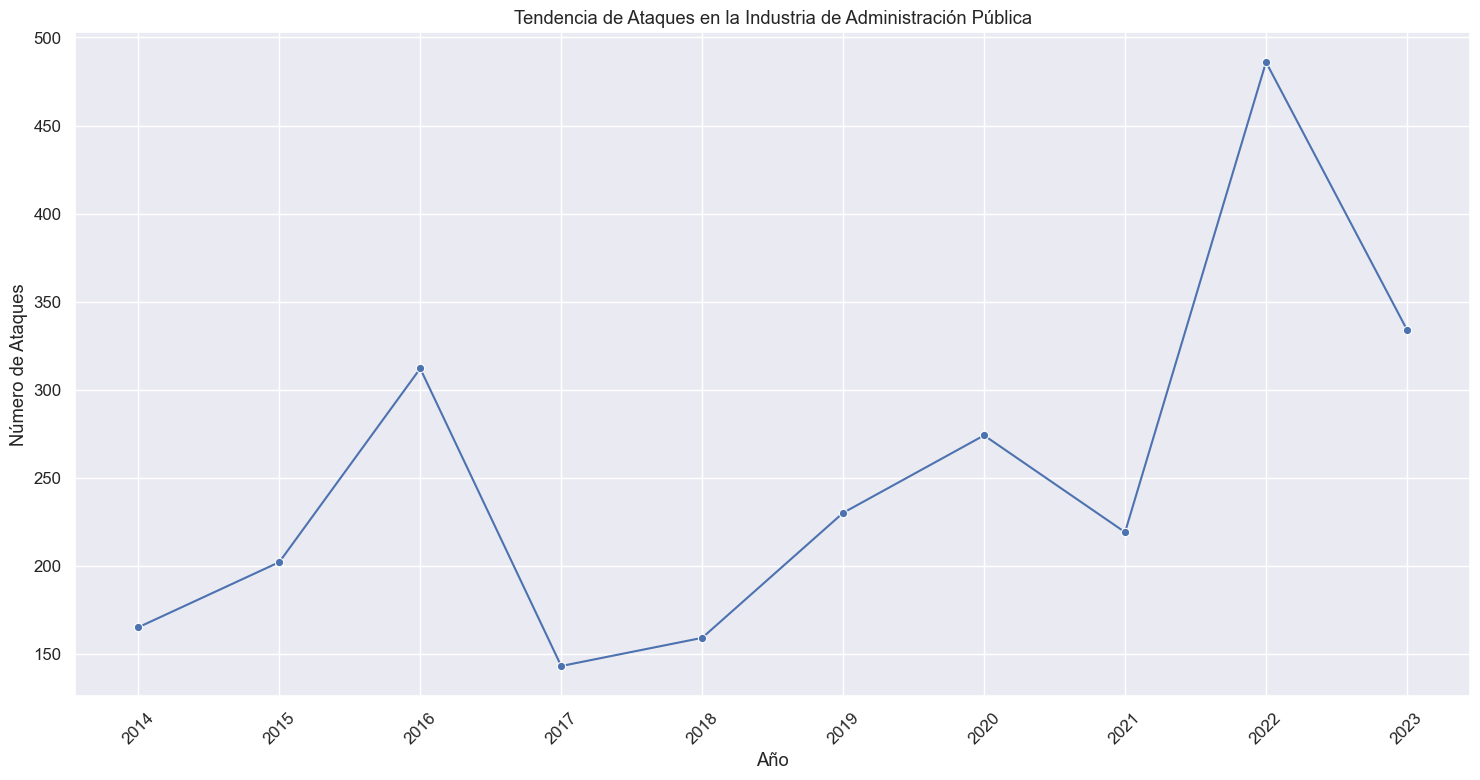

In [1064]:
# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Asegurarse de que no haya valores nulos en la columna 'date'
df = df.dropna(subset=['date'])

# Extraer el año y el mes
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)


print(df[['year', 'month']].dtypes)

# Gráfico de líneas para ataques en la industria de administración pública a lo largo de los años
public_admin_df = df[df['industry'] == 'Public Administration']
attacks_by_year_public_admin = public_admin_df.groupby('year').size().reset_index(name='count')

# Asegurar que todos los años estén incluidos hasta 2023
all_years = pd.DataFrame({'year': range(df['year'].min(), 2024)})
attacks_by_year_public_admin = all_years.merge(attacks_by_year_public_admin, on='year', how='left').fillna(0)
attacks_by_year_public_admin['count'] = attacks_by_year_public_admin['count'].astype(int)

# Crear el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=attacks_by_year_public_admin, x='year', y='count', marker='o')
plt.title('Tendencia de Ataques en la Industria de Administración Pública')
plt.xlabel('Año')
plt.ylabel('Número de Ataques')
plt.xticks(range(attacks_by_year_public_admin['year'].min(), 2024), rotation=45)
plt.tight_layout()
plt.show()

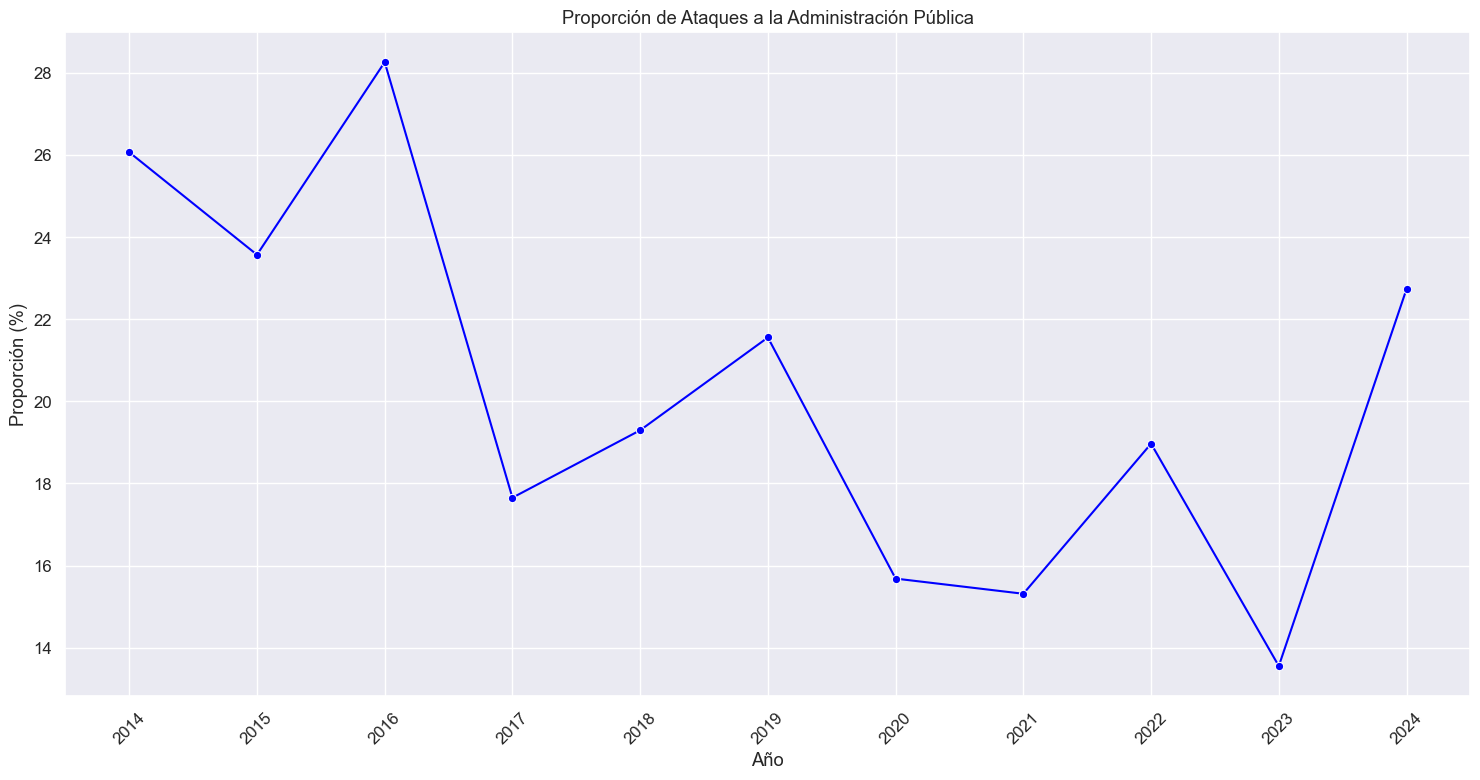

In [1065]:
# Filtrar los datos para la industria de administración pública
public_admin_df = df[df['industry'] == 'Public Administration']

# Calcular proporción de ataques a la Administración Pública
total_attacks_by_year = df.groupby('year').size().reset_index(name='total_attacks')
public_admin_attacks = public_admin_df.groupby('year').size().reset_index(name='public_admin_attacks')

# Fusionar datos y calcular proporción
proportion_df = total_attacks_by_year.merge(public_admin_attacks, on='year', how='left').fillna(0)
proportion_df['proportion'] = (proportion_df['public_admin_attacks'] / proportion_df['total_attacks']) * 100

# Gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=proportion_df, x='year', y='proportion', marker='o', color='blue')
plt.title('Proporción de Ataques a la Administración Pública')
plt.xlabel('Año')
plt.ylabel('Proporción (%)')
plt.xticks(range(proportion_df['year'].min(), proportion_df['year'].max() + 1), rotation=45)
plt.tight_layout()
plt.show()


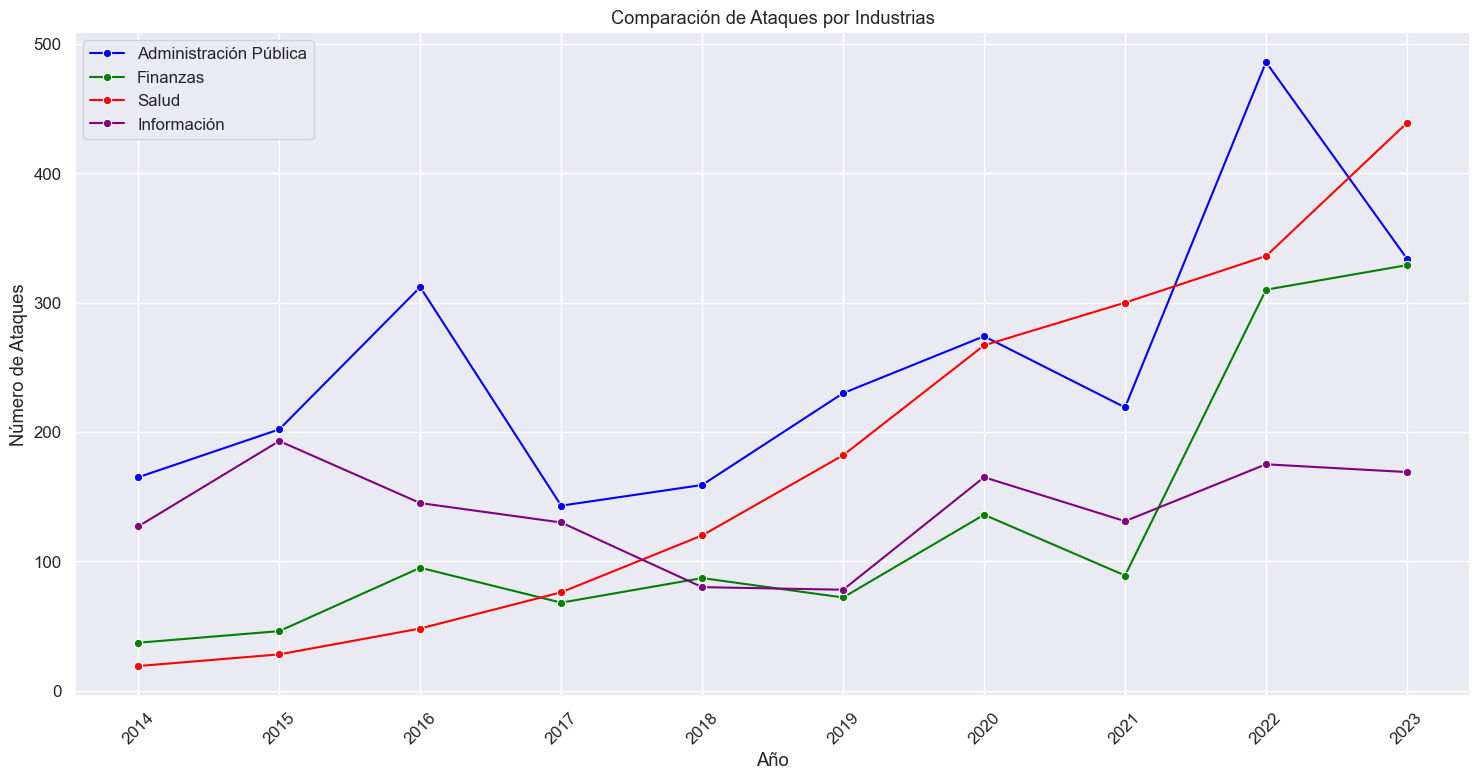

In [1075]:
# Filtrar datos por industrias Finanzas, Salud e Información
finance_df = df[df['industry'] == 'Finance and Insurance']
health_df = df[df['industry'] == 'Health Care and Social Assistance']
information_df = df[df['industry'] == 'Information']

# Contar ataques por año
public_admin_attacks = attacks_by_year_public_admin.rename(columns={'count': 'public_admin_attacks'})
finance_attacks = finance_df.groupby('year').size().reset_index(name='finance_attacks')
health_attacks = health_df.groupby('year').size().reset_index(name='health_attacks')
information_attacks = information_df.groupby('year').size().reset_index(name='information_attacks')

# Crear un DataFrame combinado con todos los años
all_years = pd.DataFrame({'year': range(df['year'].min(), 2024)})  # Asegúrate de incluir todos los años hasta 2023
comparison_df = all_years.copy()
comparison_df = comparison_df.merge(public_admin_attacks, on='year', how='left').fillna(0)
comparison_df = comparison_df.merge(finance_attacks, on='year', how='left').fillna(0)
comparison_df = comparison_df.merge(health_attacks, on='year', how='left').fillna(0)
comparison_df = comparison_df.merge(information_attacks, on='year', how='left').fillna(0)

# Asegurar que las columnas sean del tipo correcto
comparison_df[['public_admin_attacks', 'finance_attacks', 'health_attacks', 'information_attacks']] = comparison_df[
    ['public_admin_attacks', 'finance_attacks', 'health_attacks', 'information_attacks']
].astype(int)

# Gráfico de líneas para comparar tendencias
plt.figure(figsize=(15, 8))
sns.lineplot(data=comparison_df, x='year', y='public_admin_attacks', marker='o', label='Administración Pública', color='blue')
sns.lineplot(data=comparison_df, x='year', y='finance_attacks', marker='o', label='Finanzas', color='green')
sns.lineplot(data=comparison_df, x='year', y='health_attacks', marker='o', label='Salud', color='red')
sns.lineplot(data=comparison_df, x='year', y='information_attacks', marker='o', label='Información', color='purple')
plt.title('Comparación de Ataques por Industrias')
plt.xlabel('Año')
plt.ylabel('Número de Ataques')
plt.legend()
plt.xticks(range(comparison_df['year'].min(), comparison_df['year'].max() + 1), rotation=45)
plt.tight_layout()
plt.show()

In [1067]:
# Filtrar ataques a la Administración Pública
public_admin_by_country = public_admin_df['country'].value_counts().reset_index()
public_admin_by_country.columns = ['country', 'public_admin_attacks']

# Fusionar con el shapefile
world = world.merge(public_admin_by_country, how="left", left_on="NAME", right_on="country")
world['public_admin_attacks'] = world['public_admin_attacks'].fillna(0)

# Crear mapa interactivo
def style_function_public_admin(feature):
    public_admin_attacks = feature['properties']['public_admin_attacks']
    color = '#FF6666' if public_admin_attacks > 0 else '#D3D3D3'
    return {'fillColor': color, 'color': 'black', 'fillOpacity': 0.7, 'weight': 0.5}

geojson_public_admin = folium.GeoJson(
    world,
    style_function=style_function_public_admin,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'public_admin_attacks'],
        aliases=['Country', 'Public Admin Attacks'],
        localize=True
    )
)
m = folium.Map(location=[20, 0], zoom_start=2)
geojson_public_admin.add_to(m)

# Guardar el nuevo mapa
output_path_admin = r'D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\mapa_ciberataques_public_admin.html'
m.save(output_path_admin)

print(f"Mapa interactivo guardado en: {output_path_admin}")


Mapa interactivo guardado en: D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\mapa_ciberataques_public_admin.html


Test Estadisticos

1. Prueba de Tendencia Temporal:

Para validar si los ataques a la Administración Pública han aumentado significativamente a lo largo de los años, puedes realizar una Regresión Lineal o una prueba de correlación:
(a) Regresión Lineal

Comprobamos si existe una tendencia creciente en los ataques.

Pendiente: 21.26060606060606
Valor p: 0.05703607493977515
R-cuadrado: 0.38155555290975357
No se detecta una tendencia significativa en los ataques a la Administración Pública.


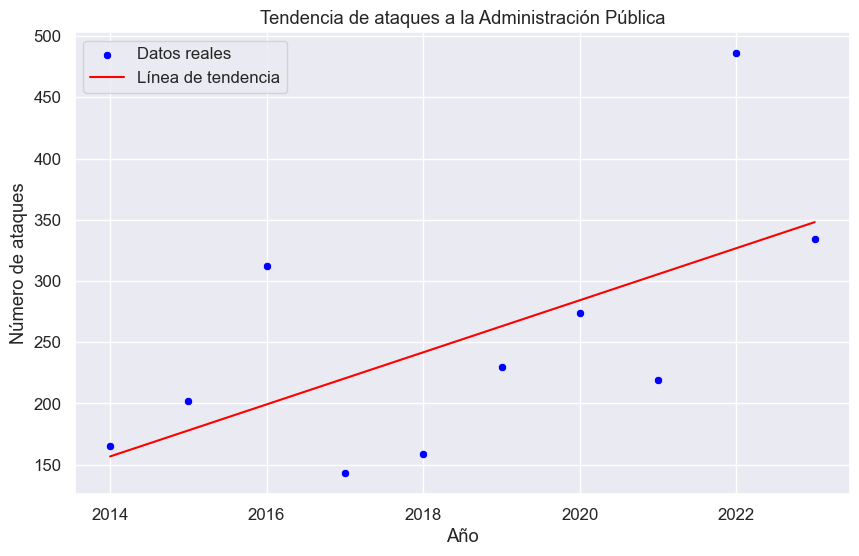

In [1068]:
# Test de regresion lineal
from scipy.stats import linregress

# Datos de ataques por año
x = attacks_by_year_public_admin['year']
y = attacks_by_year_public_admin['count']

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Pendiente: {slope}")
print(f"Valor p: {p_value}")
print(f"R-cuadrado: {r_value**2}")

# Interpretación:
if p_value < 0.05:
    print("La tendencia de ataques a la Administración Pública es estadísticamente significativa.")
else:
    print("No se detecta una tendencia significativa en los ataques a la Administración Pública.")

# Graficar la tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Datos reales')
plt.plot(x, slope * x + intercept, color='red', label='Línea de tendencia')
plt.title('Tendencia de ataques a la Administración Pública')
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.legend()
plt.show()


2. Comparación de Tendencias entre Industrias:
Anova
¿Los ataques han crecido más rápido en la Administración Pública que en Finanzas, Informacion o Salud?

In [1078]:
from scipy.stats import f_oneway

# Preparar datos de tendencias
public_admin = comparison_df['public_admin_attacks']
finance = comparison_df['finance_attacks']
health = comparison_df['health_attacks']
information = comparison_df['information_attacks']

# Realizar ANOVA
f_stat, p_value = f_oneway(public_admin, finance, health, information)

print(f"F-Estadístico: {f_stat}")
print(f"Valor p: {p_value}")

# Interpretación:
if p_value < 0.05:
    print("Hay diferencias significativas en las tendencias de ataques entre las industrias.")
else:
    print("No hay diferencias significativas en las tendencias de ataques entre las industrias.")

F-Estadístico: 2.8514736969235335
Valor p: 0.050820186060750845
No hay diferencias significativas en las tendencias de ataques entre las industrias.


3. Distribución Geográfica:
Chi-Cuadrado.
Para evaluar si los ataques a la Administración Pública se distribuyen de manera uniforme entre países o están concentrados en alguno. 

In [1070]:
from scipy.stats import chi2_contingency

# Frecuencias de ataques por país
public_admin_counts = public_admin_by_country['public_admin_attacks']

# Test de Chi-Cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency([public_admin_counts])

print(f"Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

# Interpretación:
if p_value < 0.05:
    print("Los ataques a la Administración Pública no se distribuyen uniformemente entre los países.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis de distribución uniforme.")


Chi-cuadrado: 0.0
Valor p: 1.0
No hay evidencia suficiente para rechazar la hipótesis de distribución uniforme.


4. Comparación Anual :
Prueba T 
Comparación dos períodos.

In [1071]:
from scipy.stats import ttest_ind

# Dividir los datos en dos periodos: 2014-2018 y 2019-2023
first_period = attacks_by_year_public_admin[(attacks_by_year_public_admin['year'] >= 2014) & (attacks_by_year_public_admin['year'] <= 2018)]['count']
second_period = attacks_by_year_public_admin[(attacks_by_year_public_admin['year'] >= 2019) & (attacks_by_year_public_admin['year'] <= 2023)]['count']

# Realizar prueba t
t_stat, p_value = ttest_ind(first_period, second_period, equal_var=False)

print(f"T-Estadístico: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretación:
if p_value < 0.05:
    print("La media de ataques a la Administración Pública es significativamente diferente entre los dos periodos.")
else:
    print("No hay diferencias significativas en la media de ataques entre los dos periodos.")


T-Estadístico: -1.9544131893200218
Valor p: 0.09330133500690592
No hay diferencias significativas en la media de ataques entre los dos periodos.


In [1072]:
# Especifica la ruta y el nombre del archivo CSV
output_csv_path = r'D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\sprint10_df.csv'

# Guardar el DataFrame en formato CSV
comparison_df.to_csv(output_csv_path, index=False)

print(f"Archivo CSV guardado en: {output_csv_path}")

Archivo CSV guardado en: D:\Informatica\Data Analytics\Sprint10ProyectoFinalDataAnalitycs\sprint10_df.csv
